# Anamoly Detection-Fraud Detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [201]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest # Random forest classifier

from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
import itertools

from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import average_precision_score
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
#Read the credit card data
credit = pd.read_csv('D:\Projects\Kaggle\Fraud Detection\creditcard.csv')

# 1) Simple EDA

In [4]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### There is no null values in the data and hence we dont need to spending time on data cleaning.

In [5]:
#Describe gives statistical information about all columns in the dataset
credit_dec = pd.DataFrame(credit.describe())

In [6]:
credit_dec.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
pd.DataFrame(data = [credit_dec.iloc[3,:], credit_dec.iloc[7,:]]).T

,min,max
Time,0.000000,172792.000000
V1,-56.407510,2.454930
V2,-72.715728,22.057729
V3,-48.325589,9.382558
V4,-5.683171,16.875344
V5,-113.743307,34.801666
V6,-26.160506,73.301626
V7,-43.557242,120.589494
V8,-73.216718,20.007208
V9,-13.434066,15.594995


The credit dataset has the following info:  
1) Time - seconds elapsed between each transaction and the first transaction in the dataset  
2) V1 to V28 - Features V1, V2, ... V28 are the principal components obtained with PCA  
3) Amount - transaction Amount  
4) Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  

In [9]:
credit.shape

(284807, 31)

In [10]:
credit[['Class', 'Amount']].groupby(['Class'], as_index=False).count().sort_values(by='Class', ascending=True)

,Class,Amount
0,0,284315
1,1,492


Number of Fraud Txns:  492
Number of non-Fraud Txns:  284315


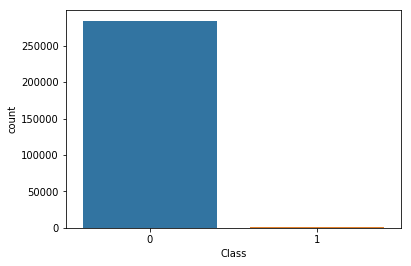

In [11]:
sns.countplot(data=credit, x = 'Class', label='Count')

NFraud, Fraud = len(credit[credit['Class']==0]), len(credit[credit['Class']==1])
print('Number of Fraud Txns: ', Fraud)
print('Number of non-Fraud Txns: ', NFraud)

In [12]:
print('Percentage of Fraudulent transactions:',Fraud/len(credit)*100,'%')
print('Percentage of non-fraudulent txns:', NFraud/len(credit)*100,'%')

Percentage of Fraudulent transactions: 0.1727485630620034 %
Percentage of non-fraudulent txns: 99.82725143693798 %


# 2) Imbalanced Data
Data is very much imbalanced with fraud txns constituting only .17%.

In [13]:
Fraud = credit[credit['Class']==1]
NFraud = credit[credit['Class']==0]

In [14]:
len(Fraud), len(NFraud)

(492, 284315)

In [15]:
Fraud.Amount.max(), Fraud.Amount.min(), NFraud.Amount.max(), NFraud.Amount.min()

(2125.87, 0.0, 25691.16, 0.0)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


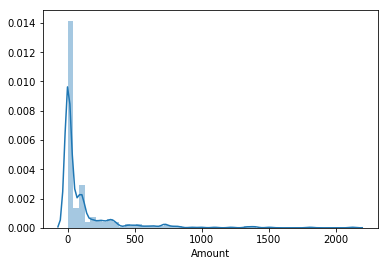

In [16]:
sns.distplot(Fraud.Amount)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


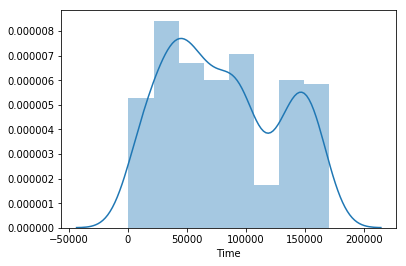

In [17]:
sns.distplot(Fraud.Time)

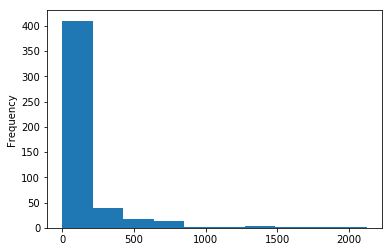

In [18]:
Fraud.Amount.plot.hist()

In [19]:
#Most of the fraud transaction amounts are < 2000. The frequenct amounts are in the range of 0-500

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


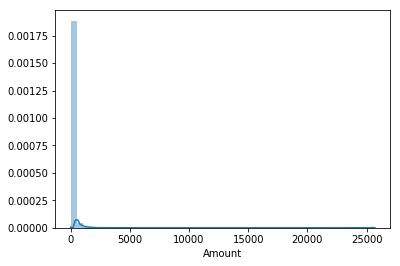

In [20]:
sns.distplot(NFraud.Amount)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


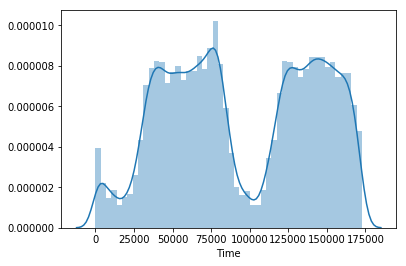

In [21]:
sns.distplot(NFraud.Time)

In [22]:
credit_corr = credit.corr()

In [23]:
credit_corr.Class[(abs(credit_corr.Class) >= 0.02) & (credit_corr.Class !=1)].sort_values()

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V18   -0.111485
V1    -0.101347
V9    -0.097733
V5    -0.094974
V6    -0.043643
V20    0.020090
V19    0.034783
V21    0.040413
V2     0.091289
V4     0.133447
V11    0.154876
Name: Class, dtype: float64

In [24]:
new_credit_corr = credit_corr[(abs(credit_corr.Class) >= 0.02) & (credit_corr.Class !=1)]

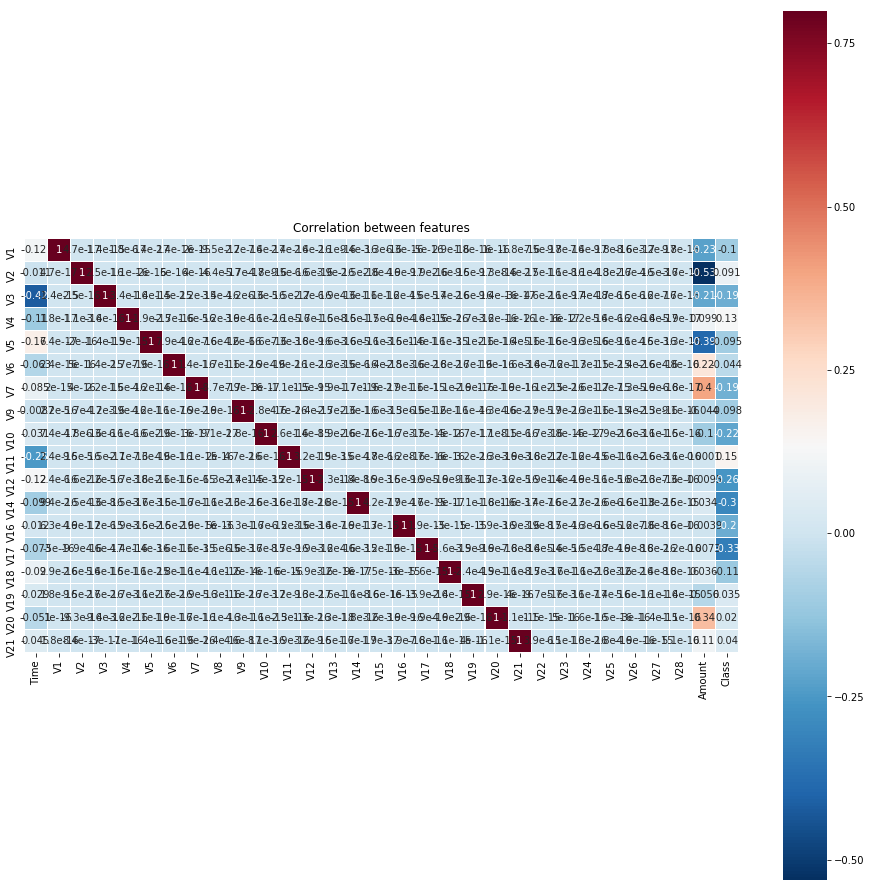

In [25]:
plt.figure(figsize=(16, 16))

sns.heatmap(new_credit_corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='RdBu_r',linecolor="white")
plt.title('Correlation between features');

# 3) PCA Components Graphs and outliers

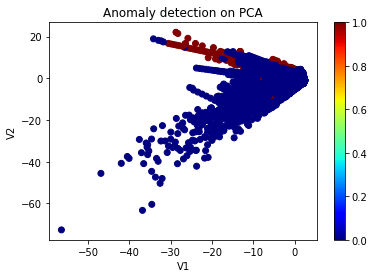

In [27]:
plt.scatter(credit.loc[:,'V1'], credit.loc[:,'V2'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V1')
plt.ylabel('V2')

plt.show()

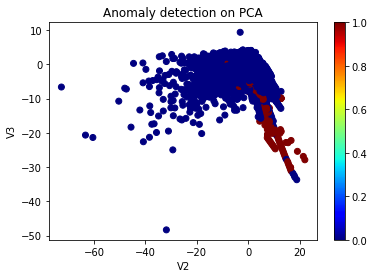

In [28]:
plt.scatter(credit.loc[:,'V2'], credit.loc[:,'V3'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V2')
plt.ylabel('V3')

plt.show()

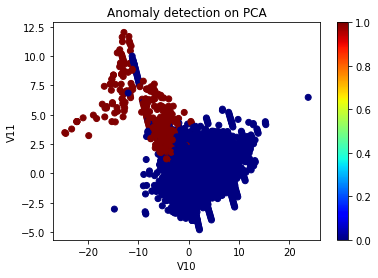

In [29]:
plt.scatter(credit.loc[:,'V10'], credit.loc[:,'V11'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V10')
plt.ylabel('V11')

plt.show()

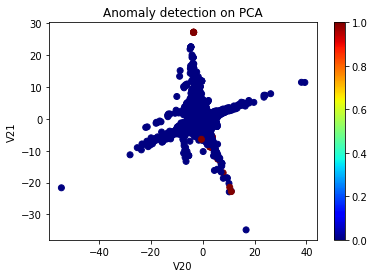

In [30]:
plt.scatter(credit.loc[:,'V20'], credit.loc[:,'V21'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V20')
plt.ylabel('V21')

plt.show()

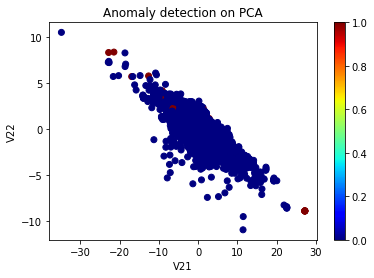

In [31]:
plt.scatter(credit.loc[:,'V21'], credit.loc[:,'V22'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V21')
plt.ylabel('V22')

plt.show()

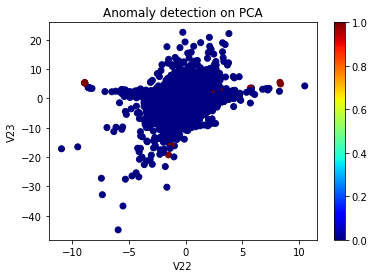

In [32]:
plt.scatter(credit.loc[:,'V22'], credit.loc[:,'V23'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V22')
plt.ylabel('V23')

plt.show()

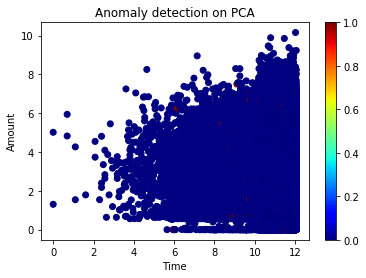

In [33]:
figsize = (12,10)
plt.scatter(np.log1p(credit.loc[:,'Time']), np.log1p(credit.loc[:,'Amount']), c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('Time')
plt.ylabel('Amount')

plt.show()

# 4) Machine Learning Models

### Model, Predict & Solve
This problem is a Classification problem. We want to identify relationship between output (Fraud or non-Fraudulent) with 
other variables or features (PCA components). We are also perfoming supervised learning as we are training our model with a given dataset. 

With these two criteria - Supervised Learning plus Classification, we can narrow down our choice of models to a few. These include:


## 4.1) Standard Scaling
The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with
μ=0 and σ=1
where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

z=(x−μ)/σ
Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.
Reference: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling

In [38]:
from sklearn.preprocessing import StandardScaler

credit['scaledAmount'] = StandardScaler().fit_transform(credit['Amount'].values.reshape(-1, 1))
credit['scaledTime'] = StandardScaler().fit_transform(credit['Time'].values.reshape(-1, 1))

In [39]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaledAmount,scaledTime
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


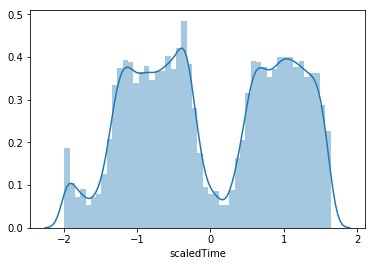

In [40]:
sns.distplot(credit.scaledTime)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


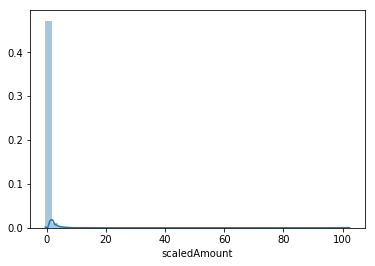

In [41]:
sns.distplot(credit.scaledAmount)

In [47]:
train_data = credit.drop(['Time', 'Amount'], axis=1)

In [48]:
X = train_data.drop('Class', axis=1)
y = train_data.Class

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(190820, 30) (190820,) (93987, 30) (93987,)


In [50]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

## 4.2 Logistic Regression

The classes are highly imbalanced. Class of 0 indicates that the transaction was considered normal and a class of 1 indicates that the transaction was fraudulent.

Since fraud txns comprises of only .17% of the total transactions, we cannot consider accuracy as an appropriate measure for the model

Logistic Regression Training Score: 
 99.93
Logistic Regression Test Score: 
 99.92
Accuracy: 
 0.9991807377616053
Confusion Matrix: 
 [[93792    18]
 [   59   118]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.87      0.67      0.75       177

avg / total       1.00      1.00      1.00     93987



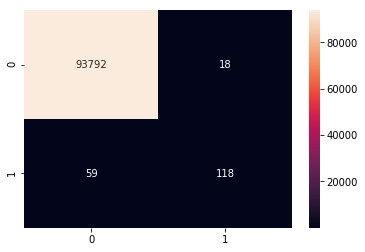

In [53]:
# Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [64]:
pd.crosstab(y_test, log_predicted,  rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,93792,18,93810
1,59,118,177
All,93851,136,93987


We have split the data into a training and a testing set at a ratio of 4:1, trained a Logistic Regression on the training set, and predicted the outcome on the testing set. The result of this prediction is depicted in the confusion matrix. We can see that almost all non-fraudulent transactions are also recognized as such. About 2/3 of all frauds are detected, but quite many are not recognized. The confusion matrix is a convenient way of illustrating the behavior of a classifier.

- The **Precision** denotes the probability that a transaction that is classified as fraud is truly a fraud.
- The **Recall** (aka. True Positive Rate) is the probability that a true fraud is recognized by the classifier.
- The **Fallout** (aka. False Positive Rate) is the probability that a non-fraud is wrongly classified as a fraud.

These numbers provide a more tangible characterization of a classifier. When tuning the parameters for a classifier, we need to ask ourselves what we expect of a "good" classifier.

- The Precision should be large (close to 1). A precision close to 0 means that a fraud alert will turn out as a mistake in the majority of the cases. This can be annoying for customers.
- The Recall should be close to 1. We want to detect frauds with a high probability. A recall of ~60% like for the classifier above is certainly not good enough - many frauds will go undetected. We definitly aim for something higher, 80% would be quite good! (Note that since frauds are often non-singular events on an account, it can be good enough to detect at least one out of two frauds - with a Recall of 80% this means that the probability that two consecutive frauds go undetected is as low as 4% already!)
- The Fallout should be very low. Customers would not want to receive a fraud alert every week. I speculate that a Fallout less than 0.1% would be adequate - for an average daily number of 3 transactions this would result in 1 wrong alert per year. Here we will actually aim for the even better fallout <3e-4.

In [69]:
cm = confusion_matrix(y_test, log_predicted)

#Thus in binary classification, the count of true negatives is
#:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
#:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]
print("True Positive:",TP, 'True Negative:', TN, 'False Negative:', FN, 'False Positive:', FP)


True Positive: 118 True Negative: 93792 False Negative: 59 False Positive: 18


In [70]:
print('Precision =     {:.3f}'.format(TP/(TP+FP)))
print('Recall (TPR) =  {:.3f}'.format(TP/(TP+FN)))
print('Fallout (FPR) = {:.3e}'.format(FP/(FP+TN)))

Precision =     0.868
Recall (TPR) =  0.667
Fallout (FPR) = 1.919e-04


In [77]:
def cm_dets(cm):
    
    TP = cm[1,1]
    TN = cm[0,0]
    FN = cm[1,0]
    FP = cm[0,1]
    precision = TP/(TP+FP)
    tpr = TP/(TP+FN)
    fpr = FP/(FP+TN)
                    
    print('Precision =     {:.3f}'.format(precision))
    print('Recall (TPR) =  {:.3f}'.format(tpr))
    print('Fallout (FPR) = {:.3e}'.format(fpr))
    return(precision, tpr, fpr)

## 4.3) Gaussian Naive Bayes

<img src="Gaussian_Naive_Bayes_Classifier_print.png", width=400, align='left'> 

Gaussian Score: 
 97.78
Gaussian Test Score: 
 97.81
[[91783  2027]
 [   33   144]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     93810
          1       0.07      0.81      0.12       177

avg / total       1.00      0.98      0.99     93987

Precision =     0.066
Recall (TPR) =  0.814
Fallout (FPR) = 2.161e-02


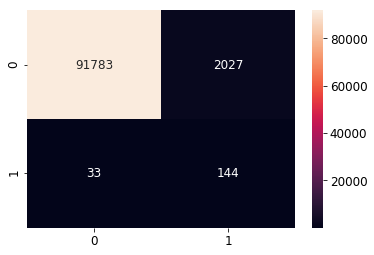

In [73]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

cm = confusion_matrix(y_test, gauss_predicted)

TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]

print('Precision =     {:.3f}'.format(TP/(TP+FP)))
print('Recall (TPR) =  {:.3f}'.format(TP/(TP+FN)))
print('Fallout (FPR) = {:.3e}'.format(FP/(FP+TN)))

## 4.4) Decision Tree

[[93764    46]
 [   40   137]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.75      0.77      0.76       177

avg / total       1.00      1.00      1.00     93987

Precision =     0.749
Recall (TPR) =  0.774
Fallout (FPR) = 4.904e-04


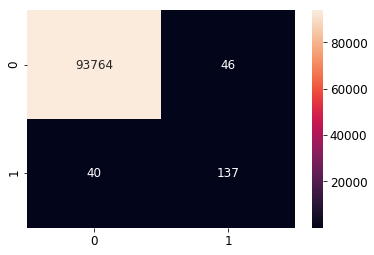

In [75]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
#Predict Output
dtree_predicted = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train)* 100, 2)
decision_tree_score_test = round(decision_tree.score(X_test, y_test)* 100, 2)
print(confusion_matrix(y_test,dtree_predicted))
print(classification_report(y_test,dtree_predicted))
sns.heatmap(confusion_matrix(y_test,dtree_predicted),annot=True,fmt="d")

cm = confusion_matrix(y_test, dtree_predicted)

TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]

print('Precision =     {:.3f}'.format(TP/(TP+FP)))
print('Recall (TPR) =  {:.3f}'.format(TP/(TP+FN)))
print('Fallout (FPR) = {:.3e}'.format(FP/(FP+TN)))

## 4.5) Random Forest

Accuracy: 
 0.9995105706108292
[[93804     6]
 [   40   137]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.96      0.77      0.86       177

avg / total       1.00      1.00      1.00     93987

Precision =     0.958
Recall (TPR) =  0.774
Fallout (FPR) = 6.396e-05


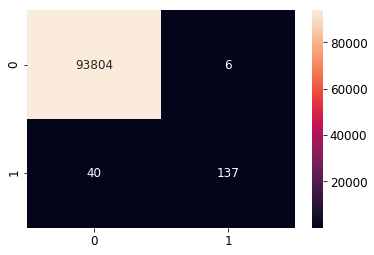

In [76]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

cm = confusion_matrix(y_test, rf_predicted)

TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]

print('Precision =     {:.3f}'.format(TP/(TP+FP)))
print('Recall (TPR) =  {:.3f}'.format(TP/(TP+FN)))
print('Fallout (FPR) = {:.3e}'.format(FP/(FP+TN)))

## 4.6) Neural Networks

Accuracy: 
 0.9993296945322225
[[93789    21]
 [   42   135]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.87      0.76      0.81       177

avg / total       1.00      1.00      1.00     93987

Precision =     0.865
Recall (TPR) =  0.763
Fallout (FPR) = 2.239e-04


(0.8653846153846154, 0.7627118644067796, 0.0002238567316917173)

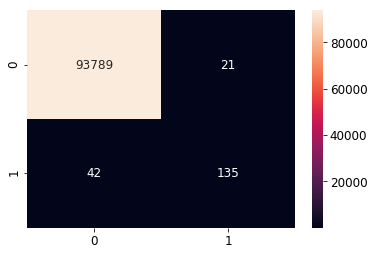

In [78]:
# Neural Networks

neural = MLPClassifier(hidden_layer_sizes=30,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=1337,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
predicted = neural.predict(X_test)

print('Accuracy: \n', accuracy_score(y_test, predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt="d")

cm_dets(confusion_matrix(y_test, predicted))

## 4.7) XGBoost
No Normalization of data is required...

## Grid Search - F1 scoring

In [80]:
train_data_new = credit.drop(['scaledAmount', 'scaledTime'], axis=1)

In [82]:
X = train_data_new.drop('Class', axis=1)
y = train_data_new.Class

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(190820, 30) (190820,) (93987, 30) (93987,)


In [84]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [88]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tried in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)

In [93]:
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6], 'min_child_weight': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [94]:
xgb_clf.best_params_

{'max_depth': 5, 'min_child_weight': 1}

In [95]:
xgb_clf.grid_scores_

[mean: 0.82008, std: 0.00827, params: {'max_depth': 1, 'min_child_weight': 1},
 mean: 0.81710, std: 0.00944, params: {'max_depth': 1, 'min_child_weight': 2},
 mean: 0.81877, std: 0.00821, params: {'max_depth': 1, 'min_child_weight': 3},
 mean: 0.80970, std: 0.01497, params: {'max_depth': 1, 'min_child_weight': 4},
 mean: 0.85134, std: 0.01505, params: {'max_depth': 2, 'min_child_weight': 1},
 mean: 0.84727, std: 0.01501, params: {'max_depth': 2, 'min_child_weight': 2},
 mean: 0.85148, std: 0.01721, params: {'max_depth': 2, 'min_child_weight': 3},
 mean: 0.85247, std: 0.02676, params: {'max_depth': 2, 'min_child_weight': 4},
 mean: 0.85125, std: 0.01126, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.85955, std: 0.00858, params: {'max_depth': 3, 'min_child_weight': 2},
 mean: 0.86695, std: 0.00891, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.85295, std: 0.01925, params: {'max_depth': 3, 'min_child_weight': 4},
 mean: 0.85631, std: 0.01213, params: {'max_depth': 

In [99]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4,8]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight':1}
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'subsample': [0.8, 0.9, 1], 'max_delta_step': [0, 1, 2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [100]:
xgb_clf.best_params_

{'max_delta_step': 0, 'subsample': 1}

In [101]:
xgb_clf.grid_scores_

[mean: 0.86296, std: 0.00748, params: {'max_delta_step': 0, 'subsample': 0.8},
 mean: 0.86371, std: 0.01091, params: {'max_delta_step': 0, 'subsample': 0.9},
 mean: 0.86960, std: 0.00968, params: {'max_delta_step': 0, 'subsample': 1},
 mean: 0.86017, std: 0.00797, params: {'max_delta_step': 1, 'subsample': 0.8},
 mean: 0.85962, std: 0.00716, params: {'max_delta_step': 1, 'subsample': 0.9},
 mean: 0.86140, std: 0.00595, params: {'max_delta_step': 1, 'subsample': 1},
 mean: 0.85598, std: 0.01158, params: {'max_delta_step': 2, 'subsample': 0.8},
 mean: 0.86548, std: 0.02047, params: {'max_delta_step': 2, 'subsample': 0.9},
 mean: 0.85405, std: 0.01063, params: {'max_delta_step': 2, 'subsample': 1},
 mean: 0.86296, std: 0.00748, params: {'max_delta_step': 4, 'subsample': 0.8},
 mean: 0.86371, std: 0.01091, params: {'max_delta_step': 4, 'subsample': 0.9},
 mean: 0.86960, std: 0.00968, params: {'max_delta_step': 4, 'subsample': 1},
 mean: 0.86296, std: 0.00748, params: {'max_delta_step': 8, 

In [102]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]}
fix_params['max_delta_step'] = 0
fix_params['subsample'] = 1
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [103]:
xgb_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [104]:
xgb_clf.best_params_

{'learning_rate': 0.2}

In [105]:
xgb_clf.grid_scores_

[mean: 0.84913, std: 0.01771, params: {'learning_rate': 0.05},
 mean: 0.85772, std: 0.01615, params: {'learning_rate': 0.1},
 mean: 0.85699, std: 0.02131, params: {'learning_rate': 0.15},
 mean: 0.86960, std: 0.00968, params: {'learning_rate': 0.2},
 mean: 0.86738, std: 0.01243, params: {'learning_rate': 0.25},
 mean: 0.85539, std: 0.01238, params: {'learning_rate': 0.3},
 mean: 0.86673, std: 0.01042, params: {'learning_rate': 0.35}]

In [106]:
fix_params['learning_rate'] = 0.2
params_final =  fix_params
print(params_final)

{'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 1, 'max_delta_step': 0, 'subsample': 1}


In [114]:
xgb_final_clf = xgb.XGBClassifier(**params_final)

In [115]:
xgb_final_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [116]:
xgb_pred_final = xgb_final_clf.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [182]:
xgb_pred_prob_final = xgb_final_clf.predict_proba(X_test)

In [119]:
len(xgb_pred_final[xgb_pred_final==1]), len(xgb_pred_final[xgb_pred_final==0])

(145, 93842)

Accuracy: 
 0.9995531296881484
[[93805     5]
 [   37   140]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.97      0.79      0.87       177

avg / total       1.00      1.00      1.00     93987

Precision =     0.966
Recall (TPR) =  0.791
Fallout (FPR) = 5.330e-05


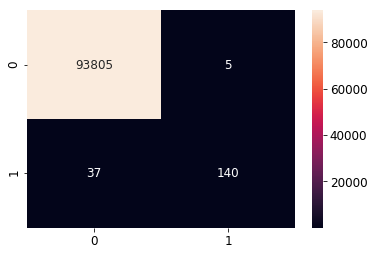

In [158]:
print('Accuracy: \n', accuracy_score(y_test, xgb_pred_final))
print(confusion_matrix(y_test,xgb_pred_final))
print(classification_report(y_test,xgb_pred_final))

sns.heatmap(confusion_matrix(y_test,xgb_pred_final),annot=True,fmt="d")

xgb_pr, xgb_tpr, xgb_fpr = cm_dets(confusion_matrix(y_test, xgb_pred_final))

# Classification Metrics

Reference: http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf
When evaluating binary decision problems, it is recommended to use Receiver Operator Characteristic (ROC) curves, which show how the number of correctly classified positive examples varies with the number of incorrectly classified negative examples. However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. Drummond and Holte (2000;2004) have recommended using cost curves to addressthis issue. Cost curves are an excellent alternative to ROC curves.

Precision-Recall (PR) curves, often used in Information Retrieval (Manning & Schutze, 1999; Raghavan et al., 1989), have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution (Bockhorst & Craven, 2005; Bunescu et al., 2004; Davis et al., 2005; Goadrich et al., 2004; Kok & Domingos, 2005; Singla & Domingos, 2005). An important difference between ROC space and PR space is the visual representation of the curves. Looking at PR curves can expose differences between algorithms that are not apparent in ROC space. 

In a binary decision problem, a classifier labels examples as either positive or negative. The decision made by the classifier can be represented in a structure known as a confusion matrix or contingency table. The confusion matrix has four categories: True positives (TP) are examples correctly labeled as positives. False positives (FP) refer to negative examples incorrectly labeled as positive. True negatives (TN) correspond to negatives correctly labeled as negative. Finally, false negatives (FN) refer to positive examples incorrectly labeled as negative.

The confusion matrix can be used to construct a point in either ROC space or PR space. Given the confusion matrix, we are able to define the metrics used in each space as in Figure 2(b). In ROC space, one plots the False Positive Rate (FPR) on the x-axis and the True Positive Rate (TPR) on the y-axis. The FPR measures the fraction of negative examples that are misclassified as positive. The TPR measures the fraction of positive examples that are correctly labeled. In PR space, one plots Recall on the x-axis and Precision on the y-axis. Recall is the same as TPR, whereas Precision measures that fraction of examples classified as
positive that are truly positive. Figure 2(b) gives the definitions for each metric. We will treat the metrics as functions that act on the underlying confusion matrix which defines a point in either ROC space or PR space. Thus, given a confusion matrix A, RECALL(A) returns the Recall associated with A.

https://scikit-learn.org/stable/modules/model_evaluation.html


- Accuracy: How often the classifier is correct = (T P + T N) / (T P + F P + T N + F N)  
- Misclassification Rate: How often the classifier is incorrect = (F P + F N) / (T P + F P + T N + F N)  
- True Positive Rate/Recall/Sensitivity : When it's actually yes, how often does it predict yes?  T P / (T P + F N)  
- Precision or positive predictive value (PPV): When it predicts yes, how often is it correct?  T P / (T P + F P)  
- Fallout/False Positive Rate: When it's actually no, how often does it predict yes? F P / (F P + T N)  
- Prevalence: How often does the yes condition actually occur in our sample? T P / (T P + F P + T N + F N)  
- Null Error Rate: This is how often you would be wrong if you always predicted the majority class. 
- Cohen's Kappa: This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance.
- F Score: This is a weighted average of the true positive rate (recall) and precision 2 * Precision * Recall / (Precision + Recall)

<b> Accuracy Paradox </b> https://en.wikipedia.org/wiki/Accuracy_paradox 

The accuracy paradox for predictive analytics states that predictive models with a given level of accuracy may have greater predictive power than models with higher accuracy. It may be better to avoid the accuracy metric in favor of other metrics such as precision and recall.

<b> Receiver Operating Characteristic </b> https://en.wikipedia.org/wiki/Receiver_operating_characteristic

A receiver operating characteristic curve, i.e., ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

In [250]:
def metrics_calc(actual, predicted, predicted_prob):
    # Compute confusion matrix
    cm = confusion_matrix(actual, predicted)
    TP = cm[1,1]
    TN = cm[0,0]
    FN = cm[1,0]
    FP = cm[0,1]
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    miscalc_rate = (FP+FN)/(TP+FP+TN+FN)
    tpr = TP/(TP+FN)
    fpr = FP/(FP+TN)
    ppv = TP/(TP+FP)
    prevalence = TP/(TP+FP+TN+FN)  
    null_accuracy = max(predicted.mean(), 1 - predicted.mean())
    f1_score = 2 * (ppv*tpr)/(ppv+tpr)               


    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(actual, predicted_prob[:,1])
    # calculate precision-recall AUC
    area_under_curve = auc(recall, precision)
    # calculate average precision score
    av_pr_score = average_precision_score(actual, predicted)
    print('-------------------------------------')
    print('Recall (TPR) = ', tpr)
    print('Fallout (FPR) = ', fpr)
    print('Precision (PPV) = ', ppv)
    print('F1 Score = ', f1_score)
    print('Area Under Curve = ', area_under_curve)
    print('Average Precision Score', av_pr_score)    
    print('-------------------------------------')
    print('Accuracy = ', accuracy)
    print('null_accuracy = ', null_accuracy)
    print('miscalc_rate = ',miscalc_rate)    

    
    return fpr, tpr, area_under_curve

In [251]:
fpr_xgb, tpr_xgb, auc_xgb = metrics_calc(y_test, xgb_pred_final, xgb_pred_prob_final)

-------------------------------------
Recall (TPR) =  0.7909604519774012
Fallout (FPR) =  5.329922183136126e-05
Precision (PPV) =  0.9655172413793104
F1 Score =  0.8695652173913044
Area Under Curve =  0.8443853597723922
Average Precision Score 0.7640796250985555
-------------------------------------
Accuracy =  0.9995531296881484
null_accuracy =  0.9984572334471788
miscalc_rate =  0.00044687031185163906


In [175]:
fpr_xgb, tpr_xgb, th_xgb = roc_curve(y_test, xgb_pred_final)

In [177]:
fpr_xgb, tpr_xgb, th_xgb

(array([0.00000000e+00, 5.32992218e-05, 1.00000000e+00]),
 array([0.        , 0.79096045, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [197]:
fpr_xgb, tpr_xgb, th_xgb = roc_curve(y_test, xgb_pred_final)
roc_auc = auc(fpr_xgb, tpr_xgb)
fpr_xgb, tpr_xgb, th_xgb, roc_auc

(array([0.00000000e+00, 5.32992218e-05, 1.00000000e+00]),
 array([0.        , 0.79096045, 1.        ]),
 array([2, 1, 0], dtype=int64),
 0.8954535763777849)

In [183]:
xgb_pred_prob_final

array([[9.9999666e-01, 3.3392014e-06],
       [9.9999398e-01, 6.0281004e-06],
       [9.9999887e-01, 1.1511726e-06],
       ...,
       [9.9999714e-01, 2.8462116e-06],
       [9.9997848e-01, 2.1487631e-05],
       [9.9999744e-01, 2.5896925e-06]], dtype=float32)

# Precision Recall Curve
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, 2015. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/



f1=0.870 auc=0.844 ap=0.764


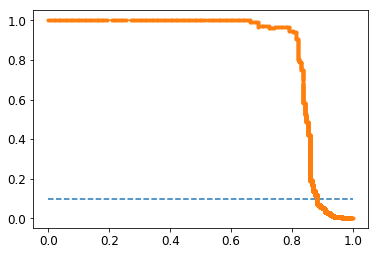

In [225]:
from sklearn.metrics import auc
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, xgb_pred_prob_final[:,1])
# calculate F1 score
f1 = f1_score(y_test, xgb_pred_final)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, xgb_pred_final)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


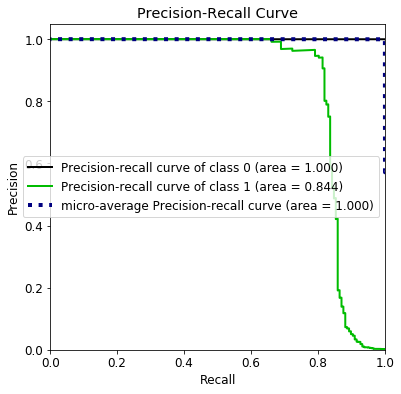

In [192]:
skplt.metrics.plot_precision_recall_curve(y_test, xgb_pred_prob_final, figsize=(6,6))
print()

# 5) LGBM Classifier

In [226]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [227]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(177, 93810, 0.0018832391713747645, 0.9981167608286252)

In [246]:
from sklearn import ensemble

# Importing modules
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GroupKFold
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb

In [ ]:
feat_impt = pd.DataFrame()
feat_impt['features'] = train_feats
feat_impt['gain'] = lgbmodel.booster_.feature_importance(importance_type='gain')
feat_impt['fold'] = fold + 1
impt = pd.concat([impt, feat_impt], axis=0, sort=False)
print("Fold# ", fold)


In [234]:
lgbmodel = lgb.LGBMClassifier(
    num_leaves=31,
    learning_rate=0.03,
    n_estimators=1000,
    subsample=.9,
    colsample_bytree=.9,
    random_state=42
)
lgbmodel.fit(
    X_train, y_train, 
    verbose=100
)

lgb_pred = lgbmodel.predict(X_test)
lgb_pred_proba = lgbmodel.predict_proba(X_test)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [252]:
fpr_lgb, tpr_lgb, roc_auc_lgb = metrics_calc(y_test, lgb_pred, lgb_pred_proba)

-------------------------------------
Recall (TPR) =  0.7966101694915254
Fallout (FPR) =  2.1319688732544504e-05
Precision (PPV) =  0.986013986013986
F1 Score =  0.8812500000000001
Area Under Curve =  0.8472076834928916
Average Precision Score 0.7858518002154888
-------------------------------------
Accuracy =  0.9995956887654676
null_accuracy =  0.9984785129858385
miscalc_rate =  0.00040431123453243533


In [253]:
print('Confusion Matrix: \n', confusion_matrix(y_test,lgb_pred))
print('Classification Report: \n', classification_report(y_test,lgb_pred))

Confusion Matrix: 
 [[93808     2]
 [   36   141]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.99      0.80      0.88       177

avg / total       1.00      1.00      1.00     93987



D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


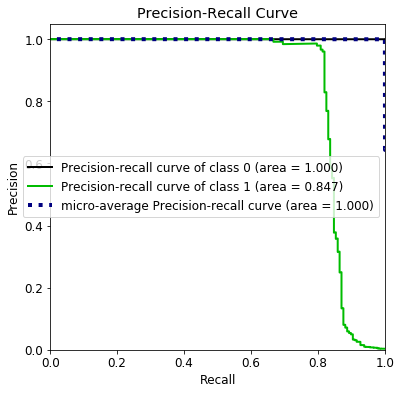

In [254]:
skplt.metrics.plot_precision_recall_curve(y_test, lgb_pred_proba, figsize=(6,6))

In [255]:
pd.crosstab(y_test, lgb_pred, colnames=['Predicted'], margins=True)

Predicted,0,1,All
Class,,,
0,93808,2,93810
1,36,141,177
All,93844,143,93987


In [257]:
len(lgb_pred[lgb_pred==0]), len(lgb_pred[lgb_pred==1])

(93844, 143)

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93808 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 2 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 36 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 141 were correctly predicted as FRAUD. 

# 6) LightGBM classifier hyperparameter optimization via scikit-learn's GridSearchCV

In [258]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.598345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896052	valid_0's binary_logloss: 0.520716
[3]	valid_0's auc: 0.907547	valid_0's binary_logloss: 0.455958
[4]	valid_0's auc: 0.913284	valid_0's binary_logloss: 0.401216
[5]	valid_0's auc: 0.912965	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.917616	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91762	valid_0's binary_logloss: 0.279291
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918196	valid_0's binary_logloss: 0.222181
[10]	valid_0's auc: 0.918074	valid_0's binary_logloss: 0.198705
[11]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.177991
[12]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.143386
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.59835
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.877445	valid_0's binary_logloss: 0.520719
[3]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.455973
[4]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.90628	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.907355	valid_0's binary_logloss: 0.314266
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356
[8]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.248897
[9]	valid_0's auc: 0.911522	valid_0's binary_logloss: 0.222193
[10]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.19873
[11]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.17801
[12]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.159672
Early stopping, best iteration is:
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.598355
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890991	valid_0's binary_logloss: 0.52072
[3]	valid_0's auc: 0.900005	valid_0's binary_logloss: 0.455981
[4]	valid_0's auc: 0.899841	valid_0's binary_logloss: 0.401255
[5]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.354511
[6]	valid_0's auc: 0.910167	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303
[8]	valid_0's auc: 0.902102	valid_0's binary_logloss: 0.248825
[9]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.177936
[12]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.159585
Early stopping, best iteration is:
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.598345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896052	valid_0's binary_logloss: 0.520716
[3]	valid_0's auc: 0.907547	valid_0's binary_logloss: 0.455958
[4]	valid_0's auc: 0.913284	valid_0's binary_logloss: 0.401216
[5]	valid_0's auc: 0.912965	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.917616	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91762	valid_0's binary_logloss: 0.279291
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918196	valid_0's binary_logloss: 0.222181
[10]	valid_0's auc: 0.918074	valid_0's binary_logloss: 0.198705
[11]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.177991
[12]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.143386
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.59835
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.877445	valid_0's binary_logloss: 0.520719
[3]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.455973
[4]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.90628	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.907355	valid_0's binary_logloss: 0.314266
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356
[8]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.248897
[9]	valid_0's auc: 0.911522	valid_0's binary_logloss: 0.222193
[10]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.19873
[11]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.17801
[12]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.159672
Early stopping, best iteration is:
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.598355
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890991	valid_0's binary_logloss: 0.52072
[3]	valid_0's auc: 0.900005	valid_0's binary_logloss: 0.455981
[4]	valid_0's auc: 0.899841	valid_0's binary_logloss: 0.401255
[5]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.354511
[6]	valid_0's auc: 0.910167	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303
[8]	valid_0's auc: 0.902102	valid_0's binary_logloss: 0.248825
[9]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.177936
[12]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.159585
Early stopping, best iteration is:
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.598345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896052	valid_0's binary_logloss: 0.520716
[3]	valid_0's auc: 0.907547	valid_0's binary_logloss: 0.455958
[4]	valid_0's auc: 0.913284	valid_0's binary_logloss: 0.401216
[5]	valid_0's auc: 0.912965	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.917616	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91762	valid_0's binary_logloss: 0.279291
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918196	valid_0's binary_logloss: 0.222181
[10]	valid_0's auc: 0.918074	valid_0's binary_logloss: 0.198705
[11]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.177991
[12]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.143386
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.59835
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.877445	valid_0's binary_logloss: 0.520719
[3]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.455973
[4]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.90628	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.907355	valid_0's binary_logloss: 0.314266
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356
[8]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.248897
[9]	valid_0's auc: 0.911522	valid_0's binary_logloss: 0.222193
[10]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.19873
[11]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.17801
[12]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.159672
Early stopping, best iteration is:
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.598355
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890991	valid_0's binary_logloss: 0.52072
[3]	valid_0's auc: 0.900005	valid_0's binary_logloss: 0.455981
[4]	valid_0's auc: 0.899841	valid_0's binary_logloss: 0.401255
[5]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.354511
[6]	valid_0's auc: 0.910167	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303
[8]	valid_0's auc: 0.902102	valid_0's binary_logloss: 0.248825
[9]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.177936
[12]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.159585
Early stopping, best iteration is:
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.598345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896052	valid_0's binary_logloss: 0.520716
[3]	valid_0's auc: 0.907547	valid_0's binary_logloss: 0.455958
[4]	valid_0's auc: 0.913284	valid_0's binary_logloss: 0.401216
[5]	valid_0's auc: 0.912965	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.917616	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91762	valid_0's binary_logloss: 0.279291
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918196	valid_0's binary_logloss: 0.222181
[10]	valid_0's auc: 0.918074	valid_0's binary_logloss: 0.198705
[11]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.177991
[12]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.143386
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.59835
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.877445	valid_0's binary_logloss: 0.520719
[3]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.455973
[4]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.90628	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.907355	valid_0's binary_logloss: 0.314266
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356
[8]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.248897
[9]	valid_0's auc: 0.911522	valid_0's binary_logloss: 0.222193
[10]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.19873
[11]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.17801
[12]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.159672
Early stopping, best iteration is:
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.598355
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890991	valid_0's binary_logloss: 0.52072
[3]	valid_0's auc: 0.900005	valid_0's binary_logloss: 0.455981
[4]	valid_0's auc: 0.899841	valid_0's binary_logloss: 0.401255
[5]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.354511
[6]	valid_0's auc: 0.910167	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303
[8]	valid_0's auc: 0.902102	valid_0's binary_logloss: 0.248825
[9]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.177936
[12]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.159585
Early stopping, best iteration is:
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.598345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896052	valid_0's binary_logloss: 0.520716
[3]	valid_0's auc: 0.907547	valid_0's binary_logloss: 0.455958
[4]	valid_0's auc: 0.913284	valid_0's binary_logloss: 0.401216
[5]	valid_0's auc: 0.912965	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.917616	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91762	valid_0's binary_logloss: 0.279291
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918196	valid_0's binary_logloss: 0.222181
[10]	valid_0's auc: 0.918074	valid_0's binary_logloss: 0.198705
[11]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.177991
[12]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.143386
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.59835
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.877445	valid_0's binary_logloss: 0.520719
[3]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.455973
[4]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.90628	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.907355	valid_0's binary_logloss: 0.314266
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356
[8]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.248897
[9]	valid_0's auc: 0.911522	valid_0's binary_logloss: 0.222193
[10]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.19873
[11]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.17801
[12]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.159672
Early stopping, best iteration is:
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.598355
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890991	valid_0's binary_logloss: 0.52072
[3]	valid_0's auc: 0.900005	valid_0's binary_logloss: 0.455981
[4]	valid_0's auc: 0.899841	valid_0's binary_logloss: 0.401255
[5]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.354511
[6]	valid_0's auc: 0.910167	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303
[8]	valid_0's auc: 0.902102	valid_0's binary_logloss: 0.248825
[9]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.177936
[12]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.159585
Early stopping, best iteration is:
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.598345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896052	valid_0's binary_logloss: 0.520716
[3]	valid_0's auc: 0.907547	valid_0's binary_logloss: 0.455958
[4]	valid_0's auc: 0.913284	valid_0's binary_logloss: 0.401216
[5]	valid_0's auc: 0.912965	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.917616	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91762	valid_0's binary_logloss: 0.279291
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918196	valid_0's binary_logloss: 0.222181
[10]	valid_0's auc: 0.918074	valid_0's binary_logloss: 0.198705
[11]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.177991
[12]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.143386
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.59835
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.877445	valid_0's binary_logloss: 0.520719
[3]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.455973
[4]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.90628	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.907355	valid_0's binary_logloss: 0.314266
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356
[8]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.248897
[9]	valid_0's auc: 0.911522	valid_0's binary_logloss: 0.222193
[10]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.19873
[11]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.17801
[12]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.159672
Early stopping, best iteration is:
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.598355
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890991	valid_0's binary_logloss: 0.52072
[3]	valid_0's auc: 0.900005	valid_0's binary_logloss: 0.455981
[4]	valid_0's auc: 0.899841	valid_0's binary_logloss: 0.401255
[5]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.354511
[6]	valid_0's auc: 0.910167	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303
[8]	valid_0's auc: 0.902102	valid_0's binary_logloss: 0.248825
[9]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.177936
[12]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.159585
Early stopping, best iteration is:
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.598345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896052	valid_0's binary_logloss: 0.520716
[3]	valid_0's auc: 0.907547	valid_0's binary_logloss: 0.455958
[4]	valid_0's auc: 0.913284	valid_0's binary_logloss: 0.401216
[5]	valid_0's auc: 0.912965	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.917616	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91762	valid_0's binary_logloss: 0.279291
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918196	valid_0's binary_logloss: 0.222181
[10]	valid_0's auc: 0.918074	valid_0's binary_logloss: 0.198705
[11]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.177991
[12]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.143386
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.59835
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.877445	valid_0's binary_logloss: 0.520719
[3]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.455973
[4]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.90628	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.907355	valid_0's binary_logloss: 0.314266
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356
[8]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.248897
[9]	valid_0's auc: 0.911522	valid_0's binary_logloss: 0.222193
[10]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.19873
[11]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.17801
[12]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.159672
Early stopping, best iteration is:
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.598355
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890991	valid_0's binary_logloss: 0.52072
[3]	valid_0's auc: 0.900005	valid_0's binary_logloss: 0.455981
[4]	valid_0's auc: 0.899841	valid_0's binary_logloss: 0.401255
[5]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.354511
[6]	valid_0's auc: 0.910167	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303
[8]	valid_0's auc: 0.902102	valid_0's binary_logloss: 0.248825
[9]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.177936
[12]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.159585
Early stopping, best iteration is:
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.598345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896052	valid_0's binary_logloss: 0.520716
[3]	valid_0's auc: 0.907547	valid_0's binary_logloss: 0.455958
[4]	valid_0's auc: 0.913284	valid_0's binary_logloss: 0.401216
[5]	valid_0's auc: 0.912965	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.917616	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91762	valid_0's binary_logloss: 0.279291
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918196	valid_0's binary_logloss: 0.222181
[10]	valid_0's auc: 0.918074	valid_0's binary_logloss: 0.198705
[11]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.177991
[12]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.143386
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918249	valid_0's binary_logloss: 0.248851


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.59835
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.877445	valid_0's binary_logloss: 0.520719
[3]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.455973
[4]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.90628	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.907355	valid_0's binary_logloss: 0.314266
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356
[8]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.248897
[9]	valid_0's auc: 0.911522	valid_0's binary_logloss: 0.222193
[10]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.19873
[11]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.17801
[12]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.159672
Early stopping, best iteration is:
[7]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.279356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.598355
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890991	valid_0's binary_logloss: 0.52072
[3]	valid_0's auc: 0.900005	valid_0's binary_logloss: 0.455981
[4]	valid_0's auc: 0.899841	valid_0's binary_logloss: 0.401255
[5]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.354511
[6]	valid_0's auc: 0.910167	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303
[8]	valid_0's auc: 0.902102	valid_0's binary_logloss: 0.248825
[9]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.177936
[12]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.159585
Early stopping, best iteration is:
[7]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.279303


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.576194
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896082	valid_0's binary_logloss: 0.48504
[3]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.41206
[4]	valid_0's auc: 0.913306	valid_0's binary_logloss: 0.352445
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918593	valid_0's binary_logloss: 0.26178
[7]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.22687
[8]	valid_0's auc: 0.918611	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918424	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918436	valid_0's binary_logloss: 0.150059
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.576201
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878021	valid_0's binary_logloss: 0.485089
[3]	valid_0's auc: 0.895632	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.352503
[5]	valid_0's auc: 0.897249	valid_0's binary_logloss: 0.303146
[6]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.261805
[7]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.226909
[8]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.197235
[9]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.171867
[10]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.150083
[11]	valid_0's auc: 0.917437	valid_0's binary_logloss: 0.131307
[12]	valid_0's auc: 0.918066	valid_0's binary_logloss: 0.115055
[13]	valid_0's auc: 0.918087	valid_0's binary_logloss: 0.100981
[14]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.0887259
[15]	valid_0's auc: 0.918029	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.576207
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891043	valid_0's binary_logloss: 0.48508
[3]	valid_0's auc: 0.910071	valid_0's binary_logloss: 0.412092
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475
[5]	valid_0's auc: 0.913538	valid_0's binary_logloss: 0.303077
[6]	valid_0's auc: 0.913896	valid_0's binary_logloss: 0.261758
[7]	valid_0's auc: 0.91359	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.197171
[9]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.171795
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.576194
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896082	valid_0's binary_logloss: 0.48504
[3]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.41206
[4]	valid_0's auc: 0.913306	valid_0's binary_logloss: 0.352445
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918593	valid_0's binary_logloss: 0.26178
[7]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.22687
[8]	valid_0's auc: 0.918611	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918424	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918436	valid_0's binary_logloss: 0.150059
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.576201
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878021	valid_0's binary_logloss: 0.485089
[3]	valid_0's auc: 0.895632	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.352503
[5]	valid_0's auc: 0.897249	valid_0's binary_logloss: 0.303146
[6]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.261805
[7]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.226909
[8]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.197235
[9]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.171867
[10]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.150083
[11]	valid_0's auc: 0.917437	valid_0's binary_logloss: 0.131307
[12]	valid_0's auc: 0.918066	valid_0's binary_logloss: 0.115055
[13]	valid_0's auc: 0.918087	valid_0's binary_logloss: 0.100981
[14]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.0887259
[15]	valid_0's auc: 0.918029	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.576207
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891043	valid_0's binary_logloss: 0.48508
[3]	valid_0's auc: 0.910071	valid_0's binary_logloss: 0.412092
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475
[5]	valid_0's auc: 0.913538	valid_0's binary_logloss: 0.303077
[6]	valid_0's auc: 0.913896	valid_0's binary_logloss: 0.261758
[7]	valid_0's auc: 0.91359	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.197171
[9]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.171795
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.576194
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896082	valid_0's binary_logloss: 0.48504
[3]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.41206
[4]	valid_0's auc: 0.913306	valid_0's binary_logloss: 0.352445
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918593	valid_0's binary_logloss: 0.26178
[7]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.22687
[8]	valid_0's auc: 0.918611	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918424	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918436	valid_0's binary_logloss: 0.150059
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.576201
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878021	valid_0's binary_logloss: 0.485089
[3]	valid_0's auc: 0.895632	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.352503
[5]	valid_0's auc: 0.897249	valid_0's binary_logloss: 0.303146
[6]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.261805
[7]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.226909
[8]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.197235
[9]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.171867
[10]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.150083
[11]	valid_0's auc: 0.917437	valid_0's binary_logloss: 0.131307
[12]	valid_0's auc: 0.918066	valid_0's binary_logloss: 0.115055
[13]	valid_0's auc: 0.918087	valid_0's binary_logloss: 0.100981
[14]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.0887259
[15]	valid_0's auc: 0.918029	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.576207
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891043	valid_0's binary_logloss: 0.48508
[3]	valid_0's auc: 0.910071	valid_0's binary_logloss: 0.412092
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475
[5]	valid_0's auc: 0.913538	valid_0's binary_logloss: 0.303077
[6]	valid_0's auc: 0.913896	valid_0's binary_logloss: 0.261758
[7]	valid_0's auc: 0.91359	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.197171
[9]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.171795
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.576194
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896082	valid_0's binary_logloss: 0.48504
[3]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.41206
[4]	valid_0's auc: 0.913306	valid_0's binary_logloss: 0.352445
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918593	valid_0's binary_logloss: 0.26178
[7]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.22687
[8]	valid_0's auc: 0.918611	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918424	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918436	valid_0's binary_logloss: 0.150059
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.576201
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878021	valid_0's binary_logloss: 0.485089
[3]	valid_0's auc: 0.895632	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.352503
[5]	valid_0's auc: 0.897249	valid_0's binary_logloss: 0.303146
[6]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.261805
[7]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.226909
[8]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.197235
[9]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.171867
[10]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.150083
[11]	valid_0's auc: 0.917437	valid_0's binary_logloss: 0.131307
[12]	valid_0's auc: 0.918066	valid_0's binary_logloss: 0.115055
[13]	valid_0's auc: 0.918087	valid_0's binary_logloss: 0.100981
[14]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.0887259
[15]	valid_0's auc: 0.918029	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.576207
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891043	valid_0's binary_logloss: 0.48508
[3]	valid_0's auc: 0.910071	valid_0's binary_logloss: 0.412092
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475
[5]	valid_0's auc: 0.913538	valid_0's binary_logloss: 0.303077
[6]	valid_0's auc: 0.913896	valid_0's binary_logloss: 0.261758
[7]	valid_0's auc: 0.91359	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.197171
[9]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.171795
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.576194
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896082	valid_0's binary_logloss: 0.48504
[3]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.41206
[4]	valid_0's auc: 0.913306	valid_0's binary_logloss: 0.352445
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918593	valid_0's binary_logloss: 0.26178
[7]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.22687
[8]	valid_0's auc: 0.918611	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918424	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918436	valid_0's binary_logloss: 0.150059
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.576201
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878021	valid_0's binary_logloss: 0.485089
[3]	valid_0's auc: 0.895632	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.352503
[5]	valid_0's auc: 0.897249	valid_0's binary_logloss: 0.303146
[6]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.261805
[7]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.226909
[8]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.197235
[9]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.171867
[10]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.150083
[11]	valid_0's auc: 0.917437	valid_0's binary_logloss: 0.131307
[12]	valid_0's auc: 0.918066	valid_0's binary_logloss: 0.115055
[13]	valid_0's auc: 0.918087	valid_0's binary_logloss: 0.100981
[14]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.0887259
[15]	valid_0's auc: 0.918029	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.576207
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891043	valid_0's binary_logloss: 0.48508
[3]	valid_0's auc: 0.910071	valid_0's binary_logloss: 0.412092
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475
[5]	valid_0's auc: 0.913538	valid_0's binary_logloss: 0.303077
[6]	valid_0's auc: 0.913896	valid_0's binary_logloss: 0.261758
[7]	valid_0's auc: 0.91359	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.197171
[9]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.171795
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.576194
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896082	valid_0's binary_logloss: 0.48504
[3]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.41206
[4]	valid_0's auc: 0.913306	valid_0's binary_logloss: 0.352445
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918593	valid_0's binary_logloss: 0.26178
[7]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.22687
[8]	valid_0's auc: 0.918611	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918424	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918436	valid_0's binary_logloss: 0.150059
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.576201
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878021	valid_0's binary_logloss: 0.485089
[3]	valid_0's auc: 0.895632	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.352503
[5]	valid_0's auc: 0.897249	valid_0's binary_logloss: 0.303146
[6]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.261805
[7]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.226909
[8]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.197235
[9]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.171867
[10]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.150083
[11]	valid_0's auc: 0.917437	valid_0's binary_logloss: 0.131307
[12]	valid_0's auc: 0.918066	valid_0's binary_logloss: 0.115055
[13]	valid_0's auc: 0.918087	valid_0's binary_logloss: 0.100981
[14]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.0887259
[15]	valid_0's auc: 0.918029	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.576207
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891043	valid_0's binary_logloss: 0.48508
[3]	valid_0's auc: 0.910071	valid_0's binary_logloss: 0.412092
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475
[5]	valid_0's auc: 0.913538	valid_0's binary_logloss: 0.303077
[6]	valid_0's auc: 0.913896	valid_0's binary_logloss: 0.261758
[7]	valid_0's auc: 0.91359	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.197171
[9]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.171795
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.576194
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896082	valid_0's binary_logloss: 0.48504
[3]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.41206
[4]	valid_0's auc: 0.913306	valid_0's binary_logloss: 0.352445
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918593	valid_0's binary_logloss: 0.26178
[7]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.22687
[8]	valid_0's auc: 0.918611	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918424	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918436	valid_0's binary_logloss: 0.150059
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.576201
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878021	valid_0's binary_logloss: 0.485089
[3]	valid_0's auc: 0.895632	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.352503
[5]	valid_0's auc: 0.897249	valid_0's binary_logloss: 0.303146
[6]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.261805
[7]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.226909
[8]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.197235
[9]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.171867
[10]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.150083
[11]	valid_0's auc: 0.917437	valid_0's binary_logloss: 0.131307
[12]	valid_0's auc: 0.918066	valid_0's binary_logloss: 0.115055
[13]	valid_0's auc: 0.918087	valid_0's binary_logloss: 0.100981
[14]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.0887259
[15]	valid_0's auc: 0.918029	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.576207
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891043	valid_0's binary_logloss: 0.48508
[3]	valid_0's auc: 0.910071	valid_0's binary_logloss: 0.412092
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475
[5]	valid_0's auc: 0.913538	valid_0's binary_logloss: 0.303077
[6]	valid_0's auc: 0.913896	valid_0's binary_logloss: 0.261758
[7]	valid_0's auc: 0.91359	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.197171
[9]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.171795
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.576194
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896082	valid_0's binary_logloss: 0.48504
[3]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.41206
[4]	valid_0's auc: 0.913306	valid_0's binary_logloss: 0.352445
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918593	valid_0's binary_logloss: 0.26178
[7]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.22687
[8]	valid_0's auc: 0.918611	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918424	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918436	valid_0's binary_logloss: 0.150059
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918627	valid_0's binary_logloss: 0.303096


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.576201
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878021	valid_0's binary_logloss: 0.485089
[3]	valid_0's auc: 0.895632	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.352503
[5]	valid_0's auc: 0.897249	valid_0's binary_logloss: 0.303146
[6]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.261805
[7]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.226909
[8]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.197235
[9]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.171867
[10]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.150083
[11]	valid_0's auc: 0.917437	valid_0's binary_logloss: 0.131307
[12]	valid_0's auc: 0.918066	valid_0's binary_logloss: 0.115055
[13]	valid_0's auc: 0.918087	valid_0's binary_logloss: 0.100981
[14]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.0887259
[15]	valid_0's auc: 0.918029	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.576207
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891043	valid_0's binary_logloss: 0.48508
[3]	valid_0's auc: 0.910071	valid_0's binary_logloss: 0.412092
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475
[5]	valid_0's auc: 0.913538	valid_0's binary_logloss: 0.303077
[6]	valid_0's auc: 0.913896	valid_0's binary_logloss: 0.261758
[7]	valid_0's auc: 0.91359	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.197171
[9]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.171795
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914364	valid_0's binary_logloss: 0.352475


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.554658
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.451943
[3]	valid_0's auc: 0.901982	valid_0's binary_logloss: 0.372823
[4]	valid_0's auc: 0.907267	valid_0's binary_logloss: 0.310301
[5]	valid_0's auc: 0.914313	valid_0's binary_logloss: 0.259945
[6]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.218925
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146
[8]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.157126
[9]	valid_0's auc: 0.914946	valid_0's binary_logloss: 0.133714
[10]	valid_0's auc: 0.914877	valid_0's binary_logloss: 0.114074
[11]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.0975452
[12]	valid_0's auc: 0.914737	valid_0's binary_logloss: 0.0835856
Early stopping, best iteration is:
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.554665
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878045	valid_0's binary_logloss: 0.451999
[3]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.372859
[4]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.310312
[5]	valid_0's auc: 0.916847	valid_0's binary_logloss: 0.259984
[6]	valid_0's auc: 0.91669	valid_0's binary_logloss: 0.21894
[7]	valid_0's auc: 0.917018	valid_0's binary_logloss: 0.185168
[8]	valid_0's auc: 0.916664	valid_0's binary_logloss: 0.157141
[9]	valid_0's auc: 0.916944	valid_0's binary_logloss: 0.133742
[10]	valid_0's auc: 0.922403	valid_0's binary_logloss: 0.114101
[11]	valid_0's auc: 0.922463	valid_0's binary_logloss: 0.0975543
[12]	valid_0's auc: 0.922647	valid_0's binary_logloss: 0.0835917
[13]	valid_0's auc: 0.92261	valid_0's binary_logloss: 0.071753
[14]	valid_0's auc: 0.922621	valid_0's binary_logloss: 0.0616905
[15]	valid_0's auc: 0.922612	valid_0's binary_logloss

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.554673
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.372854
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285
[5]	valid_0's auc: 0.909338	valid_0's binary_logloss: 0.259922
[6]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.218903
[7]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.185092
[8]	valid_0's auc: 0.90564	valid_0's binary_logloss: 0.157059
[9]	valid_0's auc: 0.905645	valid_0's binary_logloss: 0.133669
Early stopping, best iteration is:
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.554658
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.451943
[3]	valid_0's auc: 0.901982	valid_0's binary_logloss: 0.372823
[4]	valid_0's auc: 0.907267	valid_0's binary_logloss: 0.310301
[5]	valid_0's auc: 0.914313	valid_0's binary_logloss: 0.259945
[6]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.218925
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146
[8]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.157126
[9]	valid_0's auc: 0.914946	valid_0's binary_logloss: 0.133714
[10]	valid_0's auc: 0.914877	valid_0's binary_logloss: 0.114074
[11]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.0975452
[12]	valid_0's auc: 0.914737	valid_0's binary_logloss: 0.0835856
Early stopping, best iteration is:
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.554665
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878045	valid_0's binary_logloss: 0.451999
[3]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.372859
[4]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.310312
[5]	valid_0's auc: 0.916847	valid_0's binary_logloss: 0.259984
[6]	valid_0's auc: 0.91669	valid_0's binary_logloss: 0.21894
[7]	valid_0's auc: 0.917018	valid_0's binary_logloss: 0.185168
[8]	valid_0's auc: 0.916664	valid_0's binary_logloss: 0.157141
[9]	valid_0's auc: 0.916944	valid_0's binary_logloss: 0.133742
[10]	valid_0's auc: 0.922403	valid_0's binary_logloss: 0.114101
[11]	valid_0's auc: 0.922463	valid_0's binary_logloss: 0.0975543
[12]	valid_0's auc: 0.922647	valid_0's binary_logloss: 0.0835917
[13]	valid_0's auc: 0.92261	valid_0's binary_logloss: 0.071753
[14]	valid_0's auc: 0.922621	valid_0's binary_logloss: 0.0616905
[15]	valid_0's auc: 0.922612	valid_0's binary_logloss

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.554673
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.372854
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285
[5]	valid_0's auc: 0.909338	valid_0's binary_logloss: 0.259922
[6]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.218903
[7]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.185092
[8]	valid_0's auc: 0.90564	valid_0's binary_logloss: 0.157059
[9]	valid_0's auc: 0.905645	valid_0's binary_logloss: 0.133669
Early stopping, best iteration is:
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.554658
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.451943
[3]	valid_0's auc: 0.901982	valid_0's binary_logloss: 0.372823
[4]	valid_0's auc: 0.907267	valid_0's binary_logloss: 0.310301
[5]	valid_0's auc: 0.914313	valid_0's binary_logloss: 0.259945
[6]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.218925
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146
[8]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.157126
[9]	valid_0's auc: 0.914946	valid_0's binary_logloss: 0.133714
[10]	valid_0's auc: 0.914877	valid_0's binary_logloss: 0.114074
[11]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.0975452
[12]	valid_0's auc: 0.914737	valid_0's binary_logloss: 0.0835856
Early stopping, best iteration is:
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.554665
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878045	valid_0's binary_logloss: 0.451999
[3]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.372859
[4]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.310312
[5]	valid_0's auc: 0.916847	valid_0's binary_logloss: 0.259984
[6]	valid_0's auc: 0.91669	valid_0's binary_logloss: 0.21894
[7]	valid_0's auc: 0.917018	valid_0's binary_logloss: 0.185168
[8]	valid_0's auc: 0.916664	valid_0's binary_logloss: 0.157141
[9]	valid_0's auc: 0.916944	valid_0's binary_logloss: 0.133742
[10]	valid_0's auc: 0.922403	valid_0's binary_logloss: 0.114101
[11]	valid_0's auc: 0.922463	valid_0's binary_logloss: 0.0975543
[12]	valid_0's auc: 0.922647	valid_0's binary_logloss: 0.0835917
[13]	valid_0's auc: 0.92261	valid_0's binary_logloss: 0.071753
[14]	valid_0's auc: 0.922621	valid_0's binary_logloss: 0.0616905
[15]	valid_0's auc: 0.922612	valid_0's binary_logloss

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.554673
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.372854
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285
[5]	valid_0's auc: 0.909338	valid_0's binary_logloss: 0.259922
[6]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.218903
[7]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.185092
[8]	valid_0's auc: 0.90564	valid_0's binary_logloss: 0.157059
[9]	valid_0's auc: 0.905645	valid_0's binary_logloss: 0.133669
Early stopping, best iteration is:
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.554658
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.451943
[3]	valid_0's auc: 0.901982	valid_0's binary_logloss: 0.372823
[4]	valid_0's auc: 0.907267	valid_0's binary_logloss: 0.310301
[5]	valid_0's auc: 0.914313	valid_0's binary_logloss: 0.259945
[6]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.218925
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146
[8]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.157126
[9]	valid_0's auc: 0.914946	valid_0's binary_logloss: 0.133714
[10]	valid_0's auc: 0.914877	valid_0's binary_logloss: 0.114074
[11]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.0975452
[12]	valid_0's auc: 0.914737	valid_0's binary_logloss: 0.0835856
Early stopping, best iteration is:
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.554665
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878045	valid_0's binary_logloss: 0.451999
[3]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.372859
[4]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.310312
[5]	valid_0's auc: 0.916847	valid_0's binary_logloss: 0.259984
[6]	valid_0's auc: 0.91669	valid_0's binary_logloss: 0.21894
[7]	valid_0's auc: 0.917018	valid_0's binary_logloss: 0.185168
[8]	valid_0's auc: 0.916664	valid_0's binary_logloss: 0.157141
[9]	valid_0's auc: 0.916944	valid_0's binary_logloss: 0.133742
[10]	valid_0's auc: 0.922403	valid_0's binary_logloss: 0.114101
[11]	valid_0's auc: 0.922463	valid_0's binary_logloss: 0.0975543
[12]	valid_0's auc: 0.922647	valid_0's binary_logloss: 0.0835917
[13]	valid_0's auc: 0.92261	valid_0's binary_logloss: 0.071753
[14]	valid_0's auc: 0.922621	valid_0's binary_logloss: 0.0616905
[15]	valid_0's auc: 0.922612	valid_0's binary_logloss

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.554673
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.372854
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285
[5]	valid_0's auc: 0.909338	valid_0's binary_logloss: 0.259922
[6]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.218903
[7]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.185092
[8]	valid_0's auc: 0.90564	valid_0's binary_logloss: 0.157059
[9]	valid_0's auc: 0.905645	valid_0's binary_logloss: 0.133669
Early stopping, best iteration is:
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.554658
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.451943
[3]	valid_0's auc: 0.901982	valid_0's binary_logloss: 0.372823
[4]	valid_0's auc: 0.907267	valid_0's binary_logloss: 0.310301
[5]	valid_0's auc: 0.914313	valid_0's binary_logloss: 0.259945
[6]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.218925
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146
[8]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.157126
[9]	valid_0's auc: 0.914946	valid_0's binary_logloss: 0.133714
[10]	valid_0's auc: 0.914877	valid_0's binary_logloss: 0.114074
[11]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.0975452
[12]	valid_0's auc: 0.914737	valid_0's binary_logloss: 0.0835856
Early stopping, best iteration is:
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.554665
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878045	valid_0's binary_logloss: 0.451999
[3]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.372859
[4]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.310312
[5]	valid_0's auc: 0.916847	valid_0's binary_logloss: 0.259984
[6]	valid_0's auc: 0.91669	valid_0's binary_logloss: 0.21894
[7]	valid_0's auc: 0.917018	valid_0's binary_logloss: 0.185168
[8]	valid_0's auc: 0.916664	valid_0's binary_logloss: 0.157141
[9]	valid_0's auc: 0.916944	valid_0's binary_logloss: 0.133742
[10]	valid_0's auc: 0.922403	valid_0's binary_logloss: 0.114101
[11]	valid_0's auc: 0.922463	valid_0's binary_logloss: 0.0975543
[12]	valid_0's auc: 0.922647	valid_0's binary_logloss: 0.0835917
[13]	valid_0's auc: 0.92261	valid_0's binary_logloss: 0.071753
[14]	valid_0's auc: 0.922621	valid_0's binary_logloss: 0.0616905
[15]	valid_0's auc: 0.922612	valid_0's binary_logloss

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.554673
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.372854
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285
[5]	valid_0's auc: 0.909338	valid_0's binary_logloss: 0.259922
[6]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.218903
[7]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.185092
[8]	valid_0's auc: 0.90564	valid_0's binary_logloss: 0.157059
[9]	valid_0's auc: 0.905645	valid_0's binary_logloss: 0.133669
Early stopping, best iteration is:
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.554658
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.451943
[3]	valid_0's auc: 0.901982	valid_0's binary_logloss: 0.372823
[4]	valid_0's auc: 0.907267	valid_0's binary_logloss: 0.310301
[5]	valid_0's auc: 0.914313	valid_0's binary_logloss: 0.259945
[6]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.218925
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146
[8]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.157126
[9]	valid_0's auc: 0.914946	valid_0's binary_logloss: 0.133714
[10]	valid_0's auc: 0.914877	valid_0's binary_logloss: 0.114074
[11]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.0975452
[12]	valid_0's auc: 0.914737	valid_0's binary_logloss: 0.0835856
Early stopping, best iteration is:
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.554665
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878045	valid_0's binary_logloss: 0.451999
[3]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.372859
[4]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.310312
[5]	valid_0's auc: 0.916847	valid_0's binary_logloss: 0.259984
[6]	valid_0's auc: 0.91669	valid_0's binary_logloss: 0.21894
[7]	valid_0's auc: 0.917018	valid_0's binary_logloss: 0.185168
[8]	valid_0's auc: 0.916664	valid_0's binary_logloss: 0.157141
[9]	valid_0's auc: 0.916944	valid_0's binary_logloss: 0.133742
[10]	valid_0's auc: 0.922403	valid_0's binary_logloss: 0.114101
[11]	valid_0's auc: 0.922463	valid_0's binary_logloss: 0.0975543
[12]	valid_0's auc: 0.922647	valid_0's binary_logloss: 0.0835917
[13]	valid_0's auc: 0.92261	valid_0's binary_logloss: 0.071753
[14]	valid_0's auc: 0.922621	valid_0's binary_logloss: 0.0616905
[15]	valid_0's auc: 0.922612	valid_0's binary_logloss

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.554673
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.372854
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285
[5]	valid_0's auc: 0.909338	valid_0's binary_logloss: 0.259922
[6]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.218903
[7]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.185092
[8]	valid_0's auc: 0.90564	valid_0's binary_logloss: 0.157059
[9]	valid_0's auc: 0.905645	valid_0's binary_logloss: 0.133669
Early stopping, best iteration is:
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.554658
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.451943
[3]	valid_0's auc: 0.901982	valid_0's binary_logloss: 0.372823
[4]	valid_0's auc: 0.907267	valid_0's binary_logloss: 0.310301
[5]	valid_0's auc: 0.914313	valid_0's binary_logloss: 0.259945
[6]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.218925
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146
[8]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.157126
[9]	valid_0's auc: 0.914946	valid_0's binary_logloss: 0.133714
[10]	valid_0's auc: 0.914877	valid_0's binary_logloss: 0.114074
[11]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.0975452
[12]	valid_0's auc: 0.914737	valid_0's binary_logloss: 0.0835856
Early stopping, best iteration is:
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.554665
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878045	valid_0's binary_logloss: 0.451999
[3]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.372859
[4]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.310312
[5]	valid_0's auc: 0.916847	valid_0's binary_logloss: 0.259984
[6]	valid_0's auc: 0.91669	valid_0's binary_logloss: 0.21894
[7]	valid_0's auc: 0.917018	valid_0's binary_logloss: 0.185168
[8]	valid_0's auc: 0.916664	valid_0's binary_logloss: 0.157141
[9]	valid_0's auc: 0.916944	valid_0's binary_logloss: 0.133742
[10]	valid_0's auc: 0.922403	valid_0's binary_logloss: 0.114101
[11]	valid_0's auc: 0.922463	valid_0's binary_logloss: 0.0975543
[12]	valid_0's auc: 0.922647	valid_0's binary_logloss: 0.0835917
[13]	valid_0's auc: 0.92261	valid_0's binary_logloss: 0.071753
[14]	valid_0's auc: 0.922621	valid_0's binary_logloss: 0.0616905
[15]	valid_0's auc: 0.922612	valid_0's binary_logloss

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.554673
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.372854
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285
[5]	valid_0's auc: 0.909338	valid_0's binary_logloss: 0.259922
[6]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.218903
[7]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.185092
[8]	valid_0's auc: 0.90564	valid_0's binary_logloss: 0.157059
[9]	valid_0's auc: 0.905645	valid_0's binary_logloss: 0.133669
Early stopping, best iteration is:
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.554658
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.451943
[3]	valid_0's auc: 0.901982	valid_0's binary_logloss: 0.372823
[4]	valid_0's auc: 0.907267	valid_0's binary_logloss: 0.310301
[5]	valid_0's auc: 0.914313	valid_0's binary_logloss: 0.259945
[6]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.218925
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146
[8]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.157126
[9]	valid_0's auc: 0.914946	valid_0's binary_logloss: 0.133714
[10]	valid_0's auc: 0.914877	valid_0's binary_logloss: 0.114074
[11]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.0975452
[12]	valid_0's auc: 0.914737	valid_0's binary_logloss: 0.0835856
Early stopping, best iteration is:
[7]	valid_0's auc: 0.91521	valid_0's binary_logloss: 0.185146


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.554665
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.878045	valid_0's binary_logloss: 0.451999
[3]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.372859
[4]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.310312
[5]	valid_0's auc: 0.916847	valid_0's binary_logloss: 0.259984
[6]	valid_0's auc: 0.91669	valid_0's binary_logloss: 0.21894
[7]	valid_0's auc: 0.917018	valid_0's binary_logloss: 0.185168
[8]	valid_0's auc: 0.916664	valid_0's binary_logloss: 0.157141
[9]	valid_0's auc: 0.916944	valid_0's binary_logloss: 0.133742
[10]	valid_0's auc: 0.922403	valid_0's binary_logloss: 0.114101
[11]	valid_0's auc: 0.922463	valid_0's binary_logloss: 0.0975543
[12]	valid_0's auc: 0.922647	valid_0's binary_logloss: 0.0835917
[13]	valid_0's auc: 0.92261	valid_0's binary_logloss: 0.071753
[14]	valid_0's auc: 0.922621	valid_0's binary_logloss: 0.0616905
[15]	valid_0's auc: 0.922612	valid_0's binary_logloss

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.554673
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.372854
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285
[5]	valid_0's auc: 0.909338	valid_0's binary_logloss: 0.259922
[6]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.218903
[7]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.185092
[8]	valid_0's auc: 0.90564	valid_0's binary_logloss: 0.157059
[9]	valid_0's auc: 0.905645	valid_0's binary_logloss: 0.133669
Early stopping, best iteration is:
[4]	valid_0's auc: 0.915214	valid_0's binary_logloss: 0.310285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.533731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.904454	valid_0's binary_logloss: 0.337621
[4]	valid_0's auc: 0.915004	valid_0's binary_logloss: 0.273622
[5]	valid_0's auc: 0.91542	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.915349	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.920631	valid_0's binary_logloss: 0.151658
[8]	valid_0's auc: 0.920633	valid_0's binary_logloss: 0.125721
[9]	valid_0's auc: 0.92075	valid_0's binary_logloss: 0.104554
[10]	valid_0's auc: 0.920687	valid_0's binary_logloss: 0.0872153
[11]	valid_0's auc: 0.920681	valid_0's binary_logloss: 0.0729145
[12]	valid_0's auc: 0.920627	valid_0's binary_logloss: 0.0611227
[13]	valid_0's auc: 0.920545	valid_0's binary_logloss: 0.0513261
[14]	valid_0's auc: 0.920782	valid_0's binary_logloss: 0.0432311
[15]	valid_0's auc: 0.920748	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.53374
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.42124
[3]	valid_0's auc: 0.898596	valid_0's binary_logloss: 0.337722
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918216	valid_0's binary_logloss: 0.223537
[6]	valid_0's auc: 0.91367	valid_0's binary_logloss: 0.183703
[7]	valid_0's auc: 0.91393	valid_0's binary_logloss: 0.1517
[8]	valid_0's auc: 0.919352	valid_0's binary_logloss: 0.125753
[9]	valid_0's auc: 0.919331	valid_0's binary_logloss: 0.10459
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.533749
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901472	valid_0's binary_logloss: 0.421251
[3]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.337663
[4]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.273631
[5]	valid_0's auc: 0.909762	valid_0's binary_logloss: 0.223472
[6]	valid_0's auc: 0.909752	valid_0's binary_logloss: 0.183603
[7]	valid_0's auc: 0.909693	valid_0's binary_logloss: 0.151602
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654
[9]	valid_0's auc: 0.906228	valid_0's binary_logloss: 0.104489
[10]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.0871265
[11]	valid_0's auc: 0.905864	valid_0's binary_logloss: 0.0728399
[12]	valid_0's auc: 0.90582	valid_0's binary_logloss: 0.061042
[13]	valid_0's auc: 0.905819	valid_0's binary_logloss: 0.0512512
Early stopping, best iteration is:
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.533731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.904454	valid_0's binary_logloss: 0.337621
[4]	valid_0's auc: 0.915004	valid_0's binary_logloss: 0.273622
[5]	valid_0's auc: 0.91542	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.915349	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.920631	valid_0's binary_logloss: 0.151658
[8]	valid_0's auc: 0.920633	valid_0's binary_logloss: 0.125721
[9]	valid_0's auc: 0.92075	valid_0's binary_logloss: 0.104554
[10]	valid_0's auc: 0.920687	valid_0's binary_logloss: 0.0872153
[11]	valid_0's auc: 0.920681	valid_0's binary_logloss: 0.0729145
[12]	valid_0's auc: 0.920627	valid_0's binary_logloss: 0.0611227
[13]	valid_0's auc: 0.920545	valid_0's binary_logloss: 0.0513261
[14]	valid_0's auc: 0.920782	valid_0's binary_logloss: 0.0432311
[15]	valid_0's auc: 0.920748	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.53374
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.42124
[3]	valid_0's auc: 0.898596	valid_0's binary_logloss: 0.337722
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918216	valid_0's binary_logloss: 0.223537
[6]	valid_0's auc: 0.91367	valid_0's binary_logloss: 0.183703
[7]	valid_0's auc: 0.91393	valid_0's binary_logloss: 0.1517
[8]	valid_0's auc: 0.919352	valid_0's binary_logloss: 0.125753
[9]	valid_0's auc: 0.919331	valid_0's binary_logloss: 0.10459
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.533749
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901472	valid_0's binary_logloss: 0.421251
[3]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.337663
[4]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.273631
[5]	valid_0's auc: 0.909762	valid_0's binary_logloss: 0.223472
[6]	valid_0's auc: 0.909752	valid_0's binary_logloss: 0.183603
[7]	valid_0's auc: 0.909693	valid_0's binary_logloss: 0.151602
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654
[9]	valid_0's auc: 0.906228	valid_0's binary_logloss: 0.104489
[10]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.0871265
[11]	valid_0's auc: 0.905864	valid_0's binary_logloss: 0.0728399
[12]	valid_0's auc: 0.90582	valid_0's binary_logloss: 0.061042
[13]	valid_0's auc: 0.905819	valid_0's binary_logloss: 0.0512512
Early stopping, best iteration is:
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.533731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.904454	valid_0's binary_logloss: 0.337621
[4]	valid_0's auc: 0.915004	valid_0's binary_logloss: 0.273622
[5]	valid_0's auc: 0.91542	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.915349	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.920631	valid_0's binary_logloss: 0.151658
[8]	valid_0's auc: 0.920633	valid_0's binary_logloss: 0.125721
[9]	valid_0's auc: 0.92075	valid_0's binary_logloss: 0.104554
[10]	valid_0's auc: 0.920687	valid_0's binary_logloss: 0.0872153
[11]	valid_0's auc: 0.920681	valid_0's binary_logloss: 0.0729145
[12]	valid_0's auc: 0.920627	valid_0's binary_logloss: 0.0611227
[13]	valid_0's auc: 0.920545	valid_0's binary_logloss: 0.0513261
[14]	valid_0's auc: 0.920782	valid_0's binary_logloss: 0.0432311
[15]	valid_0's auc: 0.920748	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.53374
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.42124
[3]	valid_0's auc: 0.898596	valid_0's binary_logloss: 0.337722
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918216	valid_0's binary_logloss: 0.223537
[6]	valid_0's auc: 0.91367	valid_0's binary_logloss: 0.183703
[7]	valid_0's auc: 0.91393	valid_0's binary_logloss: 0.1517
[8]	valid_0's auc: 0.919352	valid_0's binary_logloss: 0.125753
[9]	valid_0's auc: 0.919331	valid_0's binary_logloss: 0.10459
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.533749
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901472	valid_0's binary_logloss: 0.421251
[3]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.337663
[4]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.273631
[5]	valid_0's auc: 0.909762	valid_0's binary_logloss: 0.223472
[6]	valid_0's auc: 0.909752	valid_0's binary_logloss: 0.183603
[7]	valid_0's auc: 0.909693	valid_0's binary_logloss: 0.151602
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654
[9]	valid_0's auc: 0.906228	valid_0's binary_logloss: 0.104489
[10]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.0871265
[11]	valid_0's auc: 0.905864	valid_0's binary_logloss: 0.0728399
[12]	valid_0's auc: 0.90582	valid_0's binary_logloss: 0.061042
[13]	valid_0's auc: 0.905819	valid_0's binary_logloss: 0.0512512
Early stopping, best iteration is:
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.533731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.904454	valid_0's binary_logloss: 0.337621
[4]	valid_0's auc: 0.915004	valid_0's binary_logloss: 0.273622
[5]	valid_0's auc: 0.91542	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.915349	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.920631	valid_0's binary_logloss: 0.151658
[8]	valid_0's auc: 0.920633	valid_0's binary_logloss: 0.125721
[9]	valid_0's auc: 0.92075	valid_0's binary_logloss: 0.104554
[10]	valid_0's auc: 0.920687	valid_0's binary_logloss: 0.0872153
[11]	valid_0's auc: 0.920681	valid_0's binary_logloss: 0.0729145
[12]	valid_0's auc: 0.920627	valid_0's binary_logloss: 0.0611227
[13]	valid_0's auc: 0.920545	valid_0's binary_logloss: 0.0513261
[14]	valid_0's auc: 0.920782	valid_0's binary_logloss: 0.0432311
[15]	valid_0's auc: 0.920748	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.53374
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.42124
[3]	valid_0's auc: 0.898596	valid_0's binary_logloss: 0.337722
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918216	valid_0's binary_logloss: 0.223537
[6]	valid_0's auc: 0.91367	valid_0's binary_logloss: 0.183703
[7]	valid_0's auc: 0.91393	valid_0's binary_logloss: 0.1517
[8]	valid_0's auc: 0.919352	valid_0's binary_logloss: 0.125753
[9]	valid_0's auc: 0.919331	valid_0's binary_logloss: 0.10459
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.533749
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901472	valid_0's binary_logloss: 0.421251
[3]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.337663
[4]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.273631
[5]	valid_0's auc: 0.909762	valid_0's binary_logloss: 0.223472
[6]	valid_0's auc: 0.909752	valid_0's binary_logloss: 0.183603
[7]	valid_0's auc: 0.909693	valid_0's binary_logloss: 0.151602
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654
[9]	valid_0's auc: 0.906228	valid_0's binary_logloss: 0.104489
[10]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.0871265
[11]	valid_0's auc: 0.905864	valid_0's binary_logloss: 0.0728399
[12]	valid_0's auc: 0.90582	valid_0's binary_logloss: 0.061042
[13]	valid_0's auc: 0.905819	valid_0's binary_logloss: 0.0512512
Early stopping, best iteration is:
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.533731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.904454	valid_0's binary_logloss: 0.337621
[4]	valid_0's auc: 0.915004	valid_0's binary_logloss: 0.273622
[5]	valid_0's auc: 0.91542	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.915349	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.920631	valid_0's binary_logloss: 0.151658
[8]	valid_0's auc: 0.920633	valid_0's binary_logloss: 0.125721
[9]	valid_0's auc: 0.92075	valid_0's binary_logloss: 0.104554
[10]	valid_0's auc: 0.920687	valid_0's binary_logloss: 0.0872153
[11]	valid_0's auc: 0.920681	valid_0's binary_logloss: 0.0729145
[12]	valid_0's auc: 0.920627	valid_0's binary_logloss: 0.0611227
[13]	valid_0's auc: 0.920545	valid_0's binary_logloss: 0.0513261
[14]	valid_0's auc: 0.920782	valid_0's binary_logloss: 0.0432311
[15]	valid_0's auc: 0.920748	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.53374
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.42124
[3]	valid_0's auc: 0.898596	valid_0's binary_logloss: 0.337722
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918216	valid_0's binary_logloss: 0.223537
[6]	valid_0's auc: 0.91367	valid_0's binary_logloss: 0.183703
[7]	valid_0's auc: 0.91393	valid_0's binary_logloss: 0.1517
[8]	valid_0's auc: 0.919352	valid_0's binary_logloss: 0.125753
[9]	valid_0's auc: 0.919331	valid_0's binary_logloss: 0.10459
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.533749
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901472	valid_0's binary_logloss: 0.421251
[3]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.337663
[4]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.273631
[5]	valid_0's auc: 0.909762	valid_0's binary_logloss: 0.223472
[6]	valid_0's auc: 0.909752	valid_0's binary_logloss: 0.183603
[7]	valid_0's auc: 0.909693	valid_0's binary_logloss: 0.151602
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654
[9]	valid_0's auc: 0.906228	valid_0's binary_logloss: 0.104489
[10]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.0871265
[11]	valid_0's auc: 0.905864	valid_0's binary_logloss: 0.0728399
[12]	valid_0's auc: 0.90582	valid_0's binary_logloss: 0.061042
[13]	valid_0's auc: 0.905819	valid_0's binary_logloss: 0.0512512
Early stopping, best iteration is:
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.533731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.904454	valid_0's binary_logloss: 0.337621
[4]	valid_0's auc: 0.915004	valid_0's binary_logloss: 0.273622
[5]	valid_0's auc: 0.91542	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.915349	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.920631	valid_0's binary_logloss: 0.151658
[8]	valid_0's auc: 0.920633	valid_0's binary_logloss: 0.125721
[9]	valid_0's auc: 0.92075	valid_0's binary_logloss: 0.104554
[10]	valid_0's auc: 0.920687	valid_0's binary_logloss: 0.0872153
[11]	valid_0's auc: 0.920681	valid_0's binary_logloss: 0.0729145
[12]	valid_0's auc: 0.920627	valid_0's binary_logloss: 0.0611227
[13]	valid_0's auc: 0.920545	valid_0's binary_logloss: 0.0513261
[14]	valid_0's auc: 0.920782	valid_0's binary_logloss: 0.0432311
[15]	valid_0's auc: 0.920748	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.53374
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.42124
[3]	valid_0's auc: 0.898596	valid_0's binary_logloss: 0.337722
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918216	valid_0's binary_logloss: 0.223537
[6]	valid_0's auc: 0.91367	valid_0's binary_logloss: 0.183703
[7]	valid_0's auc: 0.91393	valid_0's binary_logloss: 0.1517
[8]	valid_0's auc: 0.919352	valid_0's binary_logloss: 0.125753
[9]	valid_0's auc: 0.919331	valid_0's binary_logloss: 0.10459
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.533749
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901472	valid_0's binary_logloss: 0.421251
[3]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.337663
[4]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.273631
[5]	valid_0's auc: 0.909762	valid_0's binary_logloss: 0.223472
[6]	valid_0's auc: 0.909752	valid_0's binary_logloss: 0.183603
[7]	valid_0's auc: 0.909693	valid_0's binary_logloss: 0.151602
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654
[9]	valid_0's auc: 0.906228	valid_0's binary_logloss: 0.104489
[10]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.0871265
[11]	valid_0's auc: 0.905864	valid_0's binary_logloss: 0.0728399
[12]	valid_0's auc: 0.90582	valid_0's binary_logloss: 0.061042
[13]	valid_0's auc: 0.905819	valid_0's binary_logloss: 0.0512512
Early stopping, best iteration is:
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.533731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.904454	valid_0's binary_logloss: 0.337621
[4]	valid_0's auc: 0.915004	valid_0's binary_logloss: 0.273622
[5]	valid_0's auc: 0.91542	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.915349	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.920631	valid_0's binary_logloss: 0.151658
[8]	valid_0's auc: 0.920633	valid_0's binary_logloss: 0.125721
[9]	valid_0's auc: 0.92075	valid_0's binary_logloss: 0.104554
[10]	valid_0's auc: 0.920687	valid_0's binary_logloss: 0.0872153
[11]	valid_0's auc: 0.920681	valid_0's binary_logloss: 0.0729145
[12]	valid_0's auc: 0.920627	valid_0's binary_logloss: 0.0611227
[13]	valid_0's auc: 0.920545	valid_0's binary_logloss: 0.0513261
[14]	valid_0's auc: 0.920782	valid_0's binary_logloss: 0.0432311
[15]	valid_0's auc: 0.920748	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.53374
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.42124
[3]	valid_0's auc: 0.898596	valid_0's binary_logloss: 0.337722
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918216	valid_0's binary_logloss: 0.223537
[6]	valid_0's auc: 0.91367	valid_0's binary_logloss: 0.183703
[7]	valid_0's auc: 0.91393	valid_0's binary_logloss: 0.1517
[8]	valid_0's auc: 0.919352	valid_0's binary_logloss: 0.125753
[9]	valid_0's auc: 0.919331	valid_0's binary_logloss: 0.10459
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.533749
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901472	valid_0's binary_logloss: 0.421251
[3]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.337663
[4]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.273631
[5]	valid_0's auc: 0.909762	valid_0's binary_logloss: 0.223472
[6]	valid_0's auc: 0.909752	valid_0's binary_logloss: 0.183603
[7]	valid_0's auc: 0.909693	valid_0's binary_logloss: 0.151602
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654
[9]	valid_0's auc: 0.906228	valid_0's binary_logloss: 0.104489
[10]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.0871265
[11]	valid_0's auc: 0.905864	valid_0's binary_logloss: 0.0728399
[12]	valid_0's auc: 0.90582	valid_0's binary_logloss: 0.061042
[13]	valid_0's auc: 0.905819	valid_0's binary_logloss: 0.0512512
Early stopping, best iteration is:
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.533731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.904454	valid_0's binary_logloss: 0.337621
[4]	valid_0's auc: 0.915004	valid_0's binary_logloss: 0.273622
[5]	valid_0's auc: 0.91542	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.915349	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.920631	valid_0's binary_logloss: 0.151658
[8]	valid_0's auc: 0.920633	valid_0's binary_logloss: 0.125721
[9]	valid_0's auc: 0.92075	valid_0's binary_logloss: 0.104554
[10]	valid_0's auc: 0.920687	valid_0's binary_logloss: 0.0872153
[11]	valid_0's auc: 0.920681	valid_0's binary_logloss: 0.0729145
[12]	valid_0's auc: 0.920627	valid_0's binary_logloss: 0.0611227
[13]	valid_0's auc: 0.920545	valid_0's binary_logloss: 0.0513261
[14]	valid_0's auc: 0.920782	valid_0's binary_logloss: 0.0432311
[15]	valid_0's auc: 0.920748	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.53374
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.42124
[3]	valid_0's auc: 0.898596	valid_0's binary_logloss: 0.337722
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918216	valid_0's binary_logloss: 0.223537
[6]	valid_0's auc: 0.91367	valid_0's binary_logloss: 0.183703
[7]	valid_0's auc: 0.91393	valid_0's binary_logloss: 0.1517
[8]	valid_0's auc: 0.919352	valid_0's binary_logloss: 0.125753
[9]	valid_0's auc: 0.919331	valid_0's binary_logloss: 0.10459
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921403	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883124	valid_0's binary_logloss: 0.533749
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901472	valid_0's binary_logloss: 0.421251
[3]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.337663
[4]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.273631
[5]	valid_0's auc: 0.909762	valid_0's binary_logloss: 0.223472
[6]	valid_0's auc: 0.909752	valid_0's binary_logloss: 0.183603
[7]	valid_0's auc: 0.909693	valid_0's binary_logloss: 0.151602
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654
[9]	valid_0's auc: 0.906228	valid_0's binary_logloss: 0.104489
[10]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.0871265
[11]	valid_0's auc: 0.905864	valid_0's binary_logloss: 0.0728399
[12]	valid_0's auc: 0.90582	valid_0's binary_logloss: 0.061042
[13]	valid_0's auc: 0.905819	valid_0's binary_logloss: 0.0512512
Early stopping, best iteration is:
[8]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.125654


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896341	valid_0's binary_logloss: 0.392638
[3]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.306098
[4]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.24172
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628
[6]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.154556
[7]	valid_0's auc: 0.918426	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918377	valid_0's binary_logloss: 0.0821479
[10]	valid_0's auc: 0.918226	valid_0's binary_logloss: 0.0670374
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.513419
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.392688
[3]	valid_0's auc: 0.898675	valid_0's binary_logloss: 0.306182
[4]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.192631
[6]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.15455
[7]	valid_0's auc: 0.919298	valid_0's binary_logloss: 0.124679
[8]	valid_0's auc: 0.919226	valid_0's binary_logloss: 0.100972
[9]	valid_0's auc: 0.919939	valid_0's binary_logloss: 0.0821247
[10]	valid_0's auc: 0.919706	valid_0's binary_logloss: 0.0669921
[11]	valid_0's auc: 0.919634	valid_0's binary_logloss: 0.0548362
[12]	valid_0's auc: 0.919605	valid_0's binary_logloss: 0.0450195
[13]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.0370709
[14]	valid_0's auc: 0.930467	valid_0's binary_logloss: 0.0306374
[15]	valid_0's auc: 0.930421	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.51343
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.3927
[3]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.306115
[4]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.241715
[5]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.192562
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457
[7]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.124554
[8]	valid_0's auc: 0.906501	valid_0's binary_logloss: 0.10089
[9]	valid_0's auc: 0.906116	valid_0's binary_logloss: 0.0820372
[10]	valid_0's auc: 0.906025	valid_0's binary_logloss: 0.0668927
[11]	valid_0's auc: 0.905777	valid_0's binary_logloss: 0.0547311
Early stopping, best iteration is:
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896341	valid_0's binary_logloss: 0.392638
[3]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.306098
[4]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.24172
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628
[6]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.154556
[7]	valid_0's auc: 0.918426	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918377	valid_0's binary_logloss: 0.0821479
[10]	valid_0's auc: 0.918226	valid_0's binary_logloss: 0.0670374
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.513419
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.392688
[3]	valid_0's auc: 0.898675	valid_0's binary_logloss: 0.306182
[4]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.192631
[6]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.15455
[7]	valid_0's auc: 0.919298	valid_0's binary_logloss: 0.124679
[8]	valid_0's auc: 0.919226	valid_0's binary_logloss: 0.100972
[9]	valid_0's auc: 0.919939	valid_0's binary_logloss: 0.0821247
[10]	valid_0's auc: 0.919706	valid_0's binary_logloss: 0.0669921
[11]	valid_0's auc: 0.919634	valid_0's binary_logloss: 0.0548362
[12]	valid_0's auc: 0.919605	valid_0's binary_logloss: 0.0450195
[13]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.0370709
[14]	valid_0's auc: 0.930467	valid_0's binary_logloss: 0.0306374
[15]	valid_0's auc: 0.930421	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.51343
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.3927
[3]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.306115
[4]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.241715
[5]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.192562
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457
[7]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.124554
[8]	valid_0's auc: 0.906501	valid_0's binary_logloss: 0.10089
[9]	valid_0's auc: 0.906116	valid_0's binary_logloss: 0.0820372
[10]	valid_0's auc: 0.906025	valid_0's binary_logloss: 0.0668927
[11]	valid_0's auc: 0.905777	valid_0's binary_logloss: 0.0547311
Early stopping, best iteration is:
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896341	valid_0's binary_logloss: 0.392638
[3]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.306098
[4]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.24172
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628
[6]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.154556
[7]	valid_0's auc: 0.918426	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918377	valid_0's binary_logloss: 0.0821479
[10]	valid_0's auc: 0.918226	valid_0's binary_logloss: 0.0670374
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.513419
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.392688
[3]	valid_0's auc: 0.898675	valid_0's binary_logloss: 0.306182
[4]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.192631
[6]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.15455
[7]	valid_0's auc: 0.919298	valid_0's binary_logloss: 0.124679
[8]	valid_0's auc: 0.919226	valid_0's binary_logloss: 0.100972
[9]	valid_0's auc: 0.919939	valid_0's binary_logloss: 0.0821247
[10]	valid_0's auc: 0.919706	valid_0's binary_logloss: 0.0669921
[11]	valid_0's auc: 0.919634	valid_0's binary_logloss: 0.0548362
[12]	valid_0's auc: 0.919605	valid_0's binary_logloss: 0.0450195
[13]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.0370709
[14]	valid_0's auc: 0.930467	valid_0's binary_logloss: 0.0306374
[15]	valid_0's auc: 0.930421	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.51343
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.3927
[3]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.306115
[4]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.241715
[5]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.192562
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457
[7]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.124554
[8]	valid_0's auc: 0.906501	valid_0's binary_logloss: 0.10089
[9]	valid_0's auc: 0.906116	valid_0's binary_logloss: 0.0820372
[10]	valid_0's auc: 0.906025	valid_0's binary_logloss: 0.0668927
[11]	valid_0's auc: 0.905777	valid_0's binary_logloss: 0.0547311
Early stopping, best iteration is:
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896341	valid_0's binary_logloss: 0.392638
[3]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.306098
[4]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.24172
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628
[6]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.154556
[7]	valid_0's auc: 0.918426	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918377	valid_0's binary_logloss: 0.0821479
[10]	valid_0's auc: 0.918226	valid_0's binary_logloss: 0.0670374
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.513419
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.392688
[3]	valid_0's auc: 0.898675	valid_0's binary_logloss: 0.306182
[4]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.192631
[6]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.15455
[7]	valid_0's auc: 0.919298	valid_0's binary_logloss: 0.124679
[8]	valid_0's auc: 0.919226	valid_0's binary_logloss: 0.100972
[9]	valid_0's auc: 0.919939	valid_0's binary_logloss: 0.0821247
[10]	valid_0's auc: 0.919706	valid_0's binary_logloss: 0.0669921
[11]	valid_0's auc: 0.919634	valid_0's binary_logloss: 0.0548362
[12]	valid_0's auc: 0.919605	valid_0's binary_logloss: 0.0450195
[13]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.0370709
[14]	valid_0's auc: 0.930467	valid_0's binary_logloss: 0.0306374
[15]	valid_0's auc: 0.930421	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.51343
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.3927
[3]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.306115
[4]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.241715
[5]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.192562
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457
[7]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.124554
[8]	valid_0's auc: 0.906501	valid_0's binary_logloss: 0.10089
[9]	valid_0's auc: 0.906116	valid_0's binary_logloss: 0.0820372
[10]	valid_0's auc: 0.906025	valid_0's binary_logloss: 0.0668927
[11]	valid_0's auc: 0.905777	valid_0's binary_logloss: 0.0547311
Early stopping, best iteration is:
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896341	valid_0's binary_logloss: 0.392638
[3]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.306098
[4]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.24172
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628
[6]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.154556
[7]	valid_0's auc: 0.918426	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918377	valid_0's binary_logloss: 0.0821479
[10]	valid_0's auc: 0.918226	valid_0's binary_logloss: 0.0670374
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.513419
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.392688
[3]	valid_0's auc: 0.898675	valid_0's binary_logloss: 0.306182
[4]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.192631
[6]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.15455
[7]	valid_0's auc: 0.919298	valid_0's binary_logloss: 0.124679
[8]	valid_0's auc: 0.919226	valid_0's binary_logloss: 0.100972
[9]	valid_0's auc: 0.919939	valid_0's binary_logloss: 0.0821247
[10]	valid_0's auc: 0.919706	valid_0's binary_logloss: 0.0669921
[11]	valid_0's auc: 0.919634	valid_0's binary_logloss: 0.0548362
[12]	valid_0's auc: 0.919605	valid_0's binary_logloss: 0.0450195
[13]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.0370709
[14]	valid_0's auc: 0.930467	valid_0's binary_logloss: 0.0306374
[15]	valid_0's auc: 0.930421	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.51343
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.3927
[3]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.306115
[4]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.241715
[5]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.192562
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457
[7]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.124554
[8]	valid_0's auc: 0.906501	valid_0's binary_logloss: 0.10089
[9]	valid_0's auc: 0.906116	valid_0's binary_logloss: 0.0820372
[10]	valid_0's auc: 0.906025	valid_0's binary_logloss: 0.0668927
[11]	valid_0's auc: 0.905777	valid_0's binary_logloss: 0.0547311
Early stopping, best iteration is:
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896341	valid_0's binary_logloss: 0.392638
[3]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.306098
[4]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.24172
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628
[6]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.154556
[7]	valid_0's auc: 0.918426	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918377	valid_0's binary_logloss: 0.0821479
[10]	valid_0's auc: 0.918226	valid_0's binary_logloss: 0.0670374
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.513419
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.392688
[3]	valid_0's auc: 0.898675	valid_0's binary_logloss: 0.306182
[4]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.192631
[6]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.15455
[7]	valid_0's auc: 0.919298	valid_0's binary_logloss: 0.124679
[8]	valid_0's auc: 0.919226	valid_0's binary_logloss: 0.100972
[9]	valid_0's auc: 0.919939	valid_0's binary_logloss: 0.0821247
[10]	valid_0's auc: 0.919706	valid_0's binary_logloss: 0.0669921
[11]	valid_0's auc: 0.919634	valid_0's binary_logloss: 0.0548362
[12]	valid_0's auc: 0.919605	valid_0's binary_logloss: 0.0450195
[13]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.0370709
[14]	valid_0's auc: 0.930467	valid_0's binary_logloss: 0.0306374
[15]	valid_0's auc: 0.930421	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.51343
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.3927
[3]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.306115
[4]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.241715
[5]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.192562
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457
[7]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.124554
[8]	valid_0's auc: 0.906501	valid_0's binary_logloss: 0.10089
[9]	valid_0's auc: 0.906116	valid_0's binary_logloss: 0.0820372
[10]	valid_0's auc: 0.906025	valid_0's binary_logloss: 0.0668927
[11]	valid_0's auc: 0.905777	valid_0's binary_logloss: 0.0547311
Early stopping, best iteration is:
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896341	valid_0's binary_logloss: 0.392638
[3]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.306098
[4]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.24172
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628
[6]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.154556
[7]	valid_0's auc: 0.918426	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918377	valid_0's binary_logloss: 0.0821479
[10]	valid_0's auc: 0.918226	valid_0's binary_logloss: 0.0670374
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.513419
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.392688
[3]	valid_0's auc: 0.898675	valid_0's binary_logloss: 0.306182
[4]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.192631
[6]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.15455
[7]	valid_0's auc: 0.919298	valid_0's binary_logloss: 0.124679
[8]	valid_0's auc: 0.919226	valid_0's binary_logloss: 0.100972
[9]	valid_0's auc: 0.919939	valid_0's binary_logloss: 0.0821247
[10]	valid_0's auc: 0.919706	valid_0's binary_logloss: 0.0669921
[11]	valid_0's auc: 0.919634	valid_0's binary_logloss: 0.0548362
[12]	valid_0's auc: 0.919605	valid_0's binary_logloss: 0.0450195
[13]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.0370709
[14]	valid_0's auc: 0.930467	valid_0's binary_logloss: 0.0306374
[15]	valid_0's auc: 0.930421	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.51343
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.3927
[3]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.306115
[4]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.241715
[5]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.192562
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457
[7]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.124554
[8]	valid_0's auc: 0.906501	valid_0's binary_logloss: 0.10089
[9]	valid_0's auc: 0.906116	valid_0's binary_logloss: 0.0820372
[10]	valid_0's auc: 0.906025	valid_0's binary_logloss: 0.0668927
[11]	valid_0's auc: 0.905777	valid_0's binary_logloss: 0.0547311
Early stopping, best iteration is:
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883656	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.896341	valid_0's binary_logloss: 0.392638
[3]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.306098
[4]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.24172
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628
[6]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.154556
[7]	valid_0's auc: 0.918426	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918377	valid_0's binary_logloss: 0.0821479
[10]	valid_0's auc: 0.918226	valid_0's binary_logloss: 0.0670374
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918743	valid_0's binary_logloss: 0.192628


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.86343	valid_0's binary_logloss: 0.513419
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.392688
[3]	valid_0's auc: 0.898675	valid_0's binary_logloss: 0.306182
[4]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.192631
[6]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.15455
[7]	valid_0's auc: 0.919298	valid_0's binary_logloss: 0.124679
[8]	valid_0's auc: 0.919226	valid_0's binary_logloss: 0.100972
[9]	valid_0's auc: 0.919939	valid_0's binary_logloss: 0.0821247
[10]	valid_0's auc: 0.919706	valid_0's binary_logloss: 0.0669921
[11]	valid_0's auc: 0.919634	valid_0's binary_logloss: 0.0548362
[12]	valid_0's auc: 0.919605	valid_0's binary_logloss: 0.0450195
[13]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.0370709
[14]	valid_0's auc: 0.930467	valid_0's binary_logloss: 0.0306374
[15]	valid_0's auc: 0.930421	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883123	valid_0's binary_logloss: 0.51343
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.3927
[3]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.306115
[4]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.241715
[5]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.192562
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457
[7]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.124554
[8]	valid_0's auc: 0.906501	valid_0's binary_logloss: 0.10089
[9]	valid_0's auc: 0.906116	valid_0's binary_logloss: 0.0820372
[10]	valid_0's auc: 0.906025	valid_0's binary_logloss: 0.0668927
[11]	valid_0's auc: 0.905777	valid_0's binary_logloss: 0.0547311
Early stopping, best iteration is:
[6]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.154457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.934121	valid_0's binary_logloss: 0.513395
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.934742	valid_0's binary_logloss: 0.392643
[3]	valid_0's auc: 0.927789	valid_0's binary_logloss: 0.306102
[4]	valid_0's auc: 0.928498	valid_0's binary_logloss: 0.24167
[5]	valid_0's auc: 0.932699	valid_0's binary_logloss: 0.192528
[6]	valid_0's auc: 0.932817	valid_0's binary_logloss: 0.154447
[7]	valid_0's auc: 0.938519	valid_0's binary_logloss: 0.124532
[8]	valid_0's auc: 0.938569	valid_0's binary_logloss: 0.100866
[9]	valid_0's auc: 0.938708	valid_0's binary_logloss: 0.0819704
[10]	valid_0's auc: 0.938522	valid_0's binary_logloss: 0.0668469
[11]	valid_0's auc: 0.938516	valid_0's binary_logloss: 0.0546743
[12]	valid_0's auc: 0.943235	valid_0's binary_logloss: 0.0448609
[13]	valid_0's auc: 0.943156	valid_0's binary_logloss: 0.0369157
[14]	valid_0's auc: 0.948811	valid_0's binary_logloss: 0.0304563
[15]	valid_0's auc: 0.94875	valid_0's binary_lo

GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.125, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=38, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [259]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.2, 'n_estimators': 24}


In [260]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 24)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.930833	valid_0's binary_logloss: 0.513399
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.930733	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.935511	valid_0's binary_logloss: 0.306103
[4]	valid_0's auc: 0.93545	valid_0's binary_logloss: 0.24167
[5]	valid_0's auc: 0.935395	valid_0's binary_logloss: 0.192529
[6]	valid_0's auc: 0.935406	valid_0's binary_logloss: 0.154448
[7]	valid_0's auc: 0.941023	valid_0's binary_logloss: 0.124534
[8]	valid_0's auc: 0.94102	valid_0's binary_logloss: 0.100867
[9]	valid_0's auc: 0.941005	valid_0's binary_logloss: 0.0819716
[10]	valid_0's auc: 0.940992	valid_0's binary_logloss: 0.0668493
[11]	valid_0's auc: 0.940972	valid_0's binary_logloss: 0.0546767
[12]	valid_0's auc: 0.940951	valid_0's binary_logloss: 0.0448634
Early stopping, best iteration is:
[7]	valid_0's auc: 0.941023	valid_0's binary_logloss: 0.124534


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.2, max_depth=-1, metric='l1', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=24,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [261]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 24, cv=10)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.930833	valid_0's binary_logloss: 0.513399
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.930733	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.935511	valid_0's binary_logloss: 0.306103
[4]	valid_0's auc: 0.93545	valid_0's binary_logloss: 0.24167
[5]	valid_0's auc: 0.935395	valid_0's binary_logloss: 0.192529
[6]	valid_0's auc: 0.935406	valid_0's binary_logloss: 0.154448
[7]	valid_0's auc: 0.941023	valid_0's binary_logloss: 0.124534
[8]	valid_0's auc: 0.94102	valid_0's binary_logloss: 0.100867
[9]	valid_0's auc: 0.941005	valid_0's binary_logloss: 0.0819716
[10]	valid_0's auc: 0.940992	valid_0's binary_logloss: 0.0668493
[11]	valid_0's auc: 0.940972	valid_0's binary_logloss: 0.0546767
[12]	valid_0's auc: 0.940951	valid_0's binary_logloss: 0.0448634
Early stopping, best iteration is:
[7]	valid_0's auc: 0.941023	valid_0's binary_logloss: 0.124534


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        cv=10, learning_rate=0.2, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=24, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [262]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.2, 'n_estimators': 24}


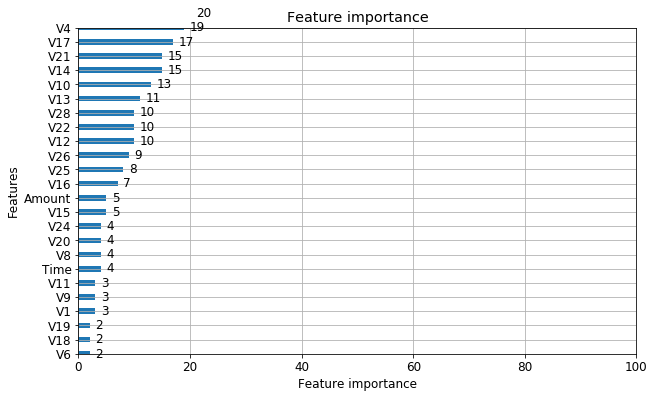

In [263]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [267]:
gbm.best_iteration_, gbm.best_score_

(7,
 defaultdict(dict,
             {'valid_0': {'auc': 0.941022845190754,
               'binary_logloss': 0.12453356448210696}}))

In [268]:
lgb_pred_best = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
lgb_pred_proba_best = gbm.predict_proba(X_test, num_iteration=gbm.best_iteration_)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [269]:
fpr_lgb_best, tpr_lgb_best, roc_auc_lgb_best = metrics_calc(y_test, lgb_pred_best, lgb_pred_proba_best)

-------------------------------------
Recall (TPR) =  0.7627118644067796
Fallout (FPR) =  7.461891056390577e-05
Precision (PPV) =  0.9507042253521126
F1 Score =  0.8463949843260187
Area Under Curve =  0.8301516692598943
Average Precision Score 0.7255602625295646
-------------------------------------
Accuracy =  0.9994786513028397
null_accuracy =  0.9984891527551683
miscalc_rate =  0.0005213486971602456


In [270]:
print('Confusion Matrix: \n', confusion_matrix(y_test,lgb_pred_best))
print('Classification Report: \n', classification_report(y_test,lgb_pred_best))

Confusion Matrix: 
 [[93803     7]
 [   42   135]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.95      0.76      0.85       177

avg / total       1.00      1.00      1.00     93987



D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


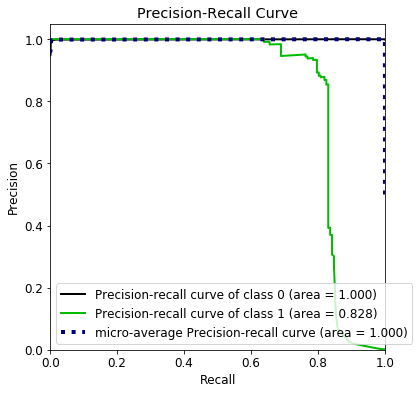

In [271]:
skplt.metrics.plot_precision_recall_curve(y_test, lgb_pred_proba_best, figsize=(6,6))

In [272]:
pd.crosstab(y_test, lgb_pred_best, colnames=['Predicted'], margins=True)

Predicted,0,1,All
Class,,,
0,93803,7,93810
1,42,135,177
All,93845,142,93987


In [273]:
len(lgb_pred_best[lgb_pred_best==0]), len(lgb_pred_best[lgb_pred_best==1])

(93845, 142)

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93803 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 7 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 42 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 135 were correctly predicted as FRAUD. 

### This performed worse than default LGBM

In [274]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169732,119832.0,-0.567132,-0.669996,1.164250,-2.968871,0.194556,0.510334,-0.449416,0.196711,-2.455120,...,-0.103921,-0.148581,-0.182487,-0.392192,-0.313288,0.690779,-0.032522,0.025178,0.046990,23.00
127069,78199.0,-0.764436,0.717186,2.443593,0.016619,-0.331366,0.151521,0.068152,0.258777,0.341374,...,0.158035,-0.122123,-0.103916,-0.317191,-0.111452,0.300101,0.400727,0.297727,0.131455,4.78
113816,73218.0,-1.830576,2.051043,1.299459,1.831527,-0.159674,1.258258,-1.072447,-2.574357,-0.656993,...,-0.796124,3.214754,-0.452761,0.078672,-0.436112,0.106623,0.152219,0.213251,0.061309,15.97
270344,164032.0,2.082792,-0.991640,-1.127478,-0.670212,-0.447162,0.188657,-0.790566,0.068130,-0.333943,...,-0.497971,-0.344494,-0.535665,0.217781,0.078550,-0.329599,0.542222,-0.050758,-0.055737,45.00
34852,37854.0,-0.421338,1.126016,0.974157,-0.209536,0.434854,-0.506608,0.848719,-0.185602,0.129109,...,0.281751,-0.411928,-0.908623,-0.136704,-0.546157,-0.053024,0.103764,0.186090,-0.077120,9.99
101663,67908.0,0.505831,-0.762040,-0.184839,1.404737,-0.024396,0.519213,0.490705,0.090915,-0.293112,...,0.433781,0.265425,0.264098,-0.378235,-0.247264,0.556091,-0.253062,-0.018589,0.051804,316.01
144194,85929.0,-0.708186,0.925920,1.027598,-0.035747,-0.322884,-0.329655,0.121266,0.636553,-0.649637,...,-0.298925,0.287856,0.620211,-0.022748,0.212983,-0.543046,0.323646,-0.016092,0.075601,12.00
187758,127678.0,2.019438,0.075429,-1.614380,0.350498,0.334586,-0.676533,0.049558,-0.070849,0.302810,...,-0.186303,-0.307064,-0.841404,0.357381,0.655076,-0.331210,0.144425,-0.069690,-0.039965,1.29
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00
186364,127071.0,-0.333564,0.760735,-0.614251,0.633001,1.631278,0.218509,1.324043,-0.030632,-0.761230,...,0.278903,0.126010,0.468271,-0.275857,-1.449097,0.199777,-0.307529,0.401256,0.227233,72.00


## 6.1) Lets normalize the data and redo lightgbm classification

In [275]:
train_data_lgb = credit.drop(['Amount', 'Time'], axis=1)

In [276]:
X = train_data_lgb.drop('Class', axis=1)
y = train_data_lgb.Class

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(190820, 30) (190820,) (93987, 30) (93987,)


In [278]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [280]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 100, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(100, 1000, 100)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2, 0.01]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 50,
        verbose=100)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Did not meet early stopping. Best iteration is:
[96]	valid_0's auc: 0.976241	valid_0's binary_logloss: 0.0035438


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Did not meet early stopping. Best iteration is:
[83]	valid_0's auc: 0.976876	valid_0's binary_logloss: 0.00330387


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.94597	valid_0's binary_logloss: 0.00372108


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.980269	valid_0's binary_logloss: 0.00425932


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.960811	valid_0's binary_logloss: 0.0043794


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Did not meet early stopping. Best iteration is:
[97]	valid_0's auc: 0.97693	valid_0's binary_logloss: 0.00489768


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Did not meet early stopping. Best iteration is:
[72]	valid_0's auc: 0.976762	valid_0's binary_logloss: 0.0038084


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.969411	valid_0's binary_logloss: 0.00509974


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Did not meet early stopping. Best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.971318	valid_0's binary_logloss: 0.00446622
Did not meet early stopping. Best iteration is:
[64]	valid_0's auc: 0.977237	valid_0's binary_logloss: 0.00335613


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.125, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=38, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [281]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.15, 'n_estimators': 100}


In [282]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 100)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.978382	valid_0's binary_logloss: 0.0032891


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.15, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [283]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 100, cv=10)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.978382	valid_0's binary_logloss: 0.0032891


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        cv=10, learning_rate=0.15, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

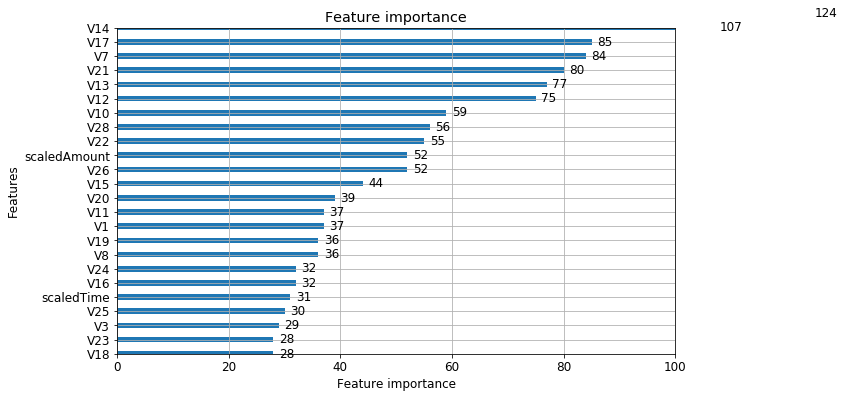

In [284]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()


In [285]:
gbm.best_iteration_, gbm.best_score_

(48,
 defaultdict(dict,
             {'valid_0': {'auc': 0.9783816850624263,
               'binary_logloss': 0.0032891043680774194}}))

In [286]:
lgb_pred_best_norm = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
lgb_pred_proba_best_norm = gbm.predict_proba(X_test, num_iteration=gbm.best_iteration_)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [287]:
fpr_lgb_best, tpr_lgb_best, roc_auc_lgb_best = metrics_calc(y_test, lgb_pred_best_norm, lgb_pred_proba_best_norm)

-------------------------------------
Recall (TPR) =  0.768361581920904
Fallout (FPR) =  6.395906619763352e-05
Precision (PPV) =  0.9577464788732394
F1 Score =  0.8526645768025077
Area Under Curve =  0.8302829458301927
Average Precision Score 0.7363318301287397
-------------------------------------
Accuracy =  0.9994999308414994
null_accuracy =  0.9984891527551683
miscalc_rate =  0.0005000691585006437


In [288]:
print('Confusion Matrix: \n', confusion_matrix(y_test,lgb_pred_best_norm))
print('Classification Report: \n', classification_report(y_test,lgb_pred_best_norm))

Confusion Matrix: 
 [[93804     6]
 [   41   136]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.96      0.77      0.85       177

avg / total       1.00      1.00      1.00     93987



D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


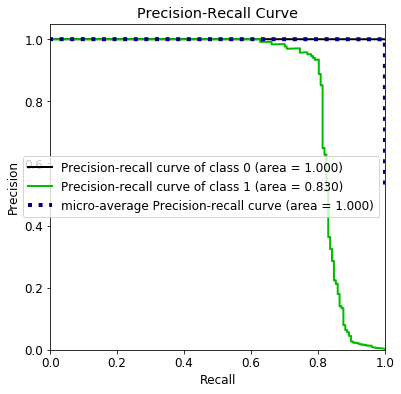

In [289]:
skplt.metrics.plot_precision_recall_curve(y_test, lgb_pred_proba_best_norm, figsize=(6,6))

In [290]:
pd.crosstab(y_test, lgb_pred_best_norm, colnames=['Predicted'], margins=True)

Predicted,0,1,All
Class,,,
0,93804,6,93810
1,41,136,177
All,93845,142,93987


In [291]:
len(lgb_pred_best_norm[lgb_pred_best_norm==0]), len(lgb_pred_best_norm[lgb_pred_best_norm==1])

(93845, 142)

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93804 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 6 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 41 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 136 were correctly predicted as FRAUD. 

### Default LGBM Observation

- True Positive(TP) : Out of 93810 normal txns, 93808 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 2 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 36 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 141 were correctly predicted as FRAUD. 

## 6.2) Training and testing with only important features

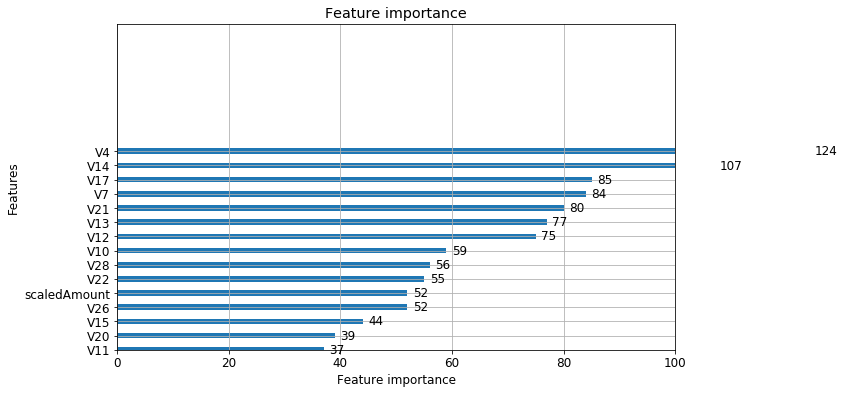

In [334]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 15, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [335]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(190820, 30) (190820,) (93987, 30) (93987,)


In [336]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [337]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(177, 93810, 0.0018832391713747645, 0.9981167608286252)

In [314]:
dtrain = lgb.Dataset(X_train, free_raw_data=False, silent=True)
dtrain.data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaledAmount,scaledTime
169732,-0.567132,-0.669996,1.164250,-2.968871,0.194556,0.510334,-0.449416,0.196711,-2.455120,0.741254,...,-0.148581,-0.182487,-0.392192,-0.313288,0.690779,-0.032522,0.025178,0.046990,-0.261273,0.526830
127069,-0.764436,0.717186,2.443593,0.016619,-0.331366,0.151521,0.068152,0.258777,0.341374,-0.605521,...,-0.122123,-0.103916,-0.317191,-0.111452,0.300101,0.400727,0.297727,0.131455,-0.334119,-0.349874
113816,-1.830576,2.051043,1.299459,1.831527,-0.159674,1.258258,-1.072447,-2.574357,-0.656993,0.089990,...,3.214754,-0.452761,0.078672,-0.436112,0.106623,0.152219,0.213251,0.061309,-0.289380,-0.454764
270344,2.082792,-0.991640,-1.127478,-0.670212,-0.447162,0.188657,-0.790566,0.068130,-0.333943,1.013908,...,-0.344494,-0.535665,0.217781,0.078550,-0.329599,0.542222,-0.050758,-0.055737,-0.173316,1.457590
34852,-0.421338,1.126016,0.974157,-0.209536,0.434854,-0.506608,0.848719,-0.185602,0.129109,0.031669,...,-0.411928,-0.908623,-0.136704,-0.546157,-0.053024,0.103764,0.186090,-0.077120,-0.313289,-1.199456


In [322]:
lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': None,
        'bagging_freq': 1,
        'n_jobs': 4
    }
# Fit the model
lgbrf_clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200)

lgbrf_pred = lgbrf_clf.predict(X_test)

In [333]:
# Get feature importances
feat_impt = pd.DataFrame()
feat_impt["feature"] = X_train.columns.tolist()
feat_impt["importance_gain"] = lgbrf_clf.feature_importance(importance_type='gain')
feat_impt["importance_split"] = lgbrf_clf.feature_importance(importance_type='split')
feat_impt['roc_auc_score'] = roc_auc_score(y_test, lgbrf_pred)
feat_impt['prec_score'] = average_precision_score(y_test, lgbrf_pred)

feat_impt

,feature,importance_gain,importance_split,roc_auc_score,prec_score
0,V1,0.0,0,0.5,0.001883
1,V2,0.0,0,0.5,0.001883
2,V3,0.0,0,0.5,0.001883
3,V4,0.0,0,0.5,0.001883
4,V5,0.0,0,0.5,0.001883
5,V6,0.0,0,0.5,0.001883
6,V7,0.0,0,0.5,0.001883
7,V8,0.0,0,0.5,0.001883
8,V9,0.0,0,0.5,0.001883
9,V10,0.0,0,0.5,0.001883


In [338]:
# Fit LightGBM in RF mode
lgb_params = {
        'learning_rate': 0.15,
        'metric': 'l1', 
        'n_estimators': 100,
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': None,
        'bagging_freq': 1,
        'n_jobs': 4
    }
lgbm = lgb.LGBMClassifier(**lgb_params)

# Fit the model
lgbrf_clf = lgbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)  

lgbrf_pred = lgbrf_clf.predict(X_test)
lgbrf_pred_proba = lgbrf_clf.predict_proba(X_test)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.926863	valid_0's binary_logloss: 0.128285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [339]:
fpr_lgbrf, tpr_lgbrf, roc_auc_lgbrf = metrics_calc(y_test, lgbrf_pred, lgbrf_pred_proba)

-------------------------------------
Recall (TPR) =  0.7457627118644068
Fallout (FPR) =  0.00013857797676153927
Precision (PPV) =  0.9103448275862069
F1 Score =  0.8198757763975155
Area Under Curve =  0.81987842074989
Average Precision Score 0.6793800169722666
-------------------------------------
Accuracy =  0.9993828933788715
null_accuracy =  0.9984572334471788
miscalc_rate =  0.000617106621128454


In [340]:
print('Confusion Matrix: \n', confusion_matrix(y_test,lgbrf_pred))
print('Classification Report: \n', classification_report(y_test,lgbrf_pred))

Confusion Matrix: 
 [[93797    13]
 [   45   132]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.91      0.75      0.82       177

avg / total       1.00      1.00      1.00     93987



D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


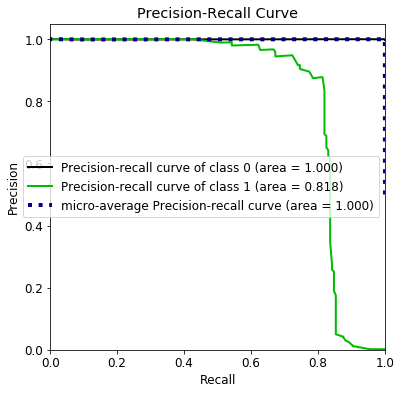

In [341]:
skplt.metrics.plot_precision_recall_curve(y_test, lgbrf_pred_proba, figsize=(6,6))

In [342]:
pd.crosstab(y_test, lgbrf_pred, colnames=['Predicted'], margins=True)

Predicted,0,1,All
Class,,,
0,93797,13,93810
1,45,132,177
All,93842,145,93987


In [344]:
len(lgbrf_pred[lgbrf_pred==0]), len(lgbrf_pred[lgbrf_pred==1])

(93842, 145)

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93797 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 13 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 45 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 132 were correctly predicted as FRAUD. 

### Not much improvement with RF & LGBM


# 7) Random Fortest Classifier with hyper parameter tuning

In [345]:
# Random Forest Classification
rfmodel = RandomForestClassifier(random_state = 42)  
rfmodel.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [357]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth = [10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 132, 255, 377, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [358]:
rfmodel = RandomForestClassifier()
rfmodel_gridsearch = GridSearchCV(rfmodel, param_grid)
rfmodel_gridsearch.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rfmodel_gridsearch.best

# AdaBoost

In [ ]:
rfcmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5, 
                                 random_state=42)
adamodel = AdaBoostRegressor(base_estimator=rfcmodel, random_state=42, n_estimators=100)
adamodel.fit(X_train, y_train)
adamodel.score(X_test,y_test)

# Isolation Forest

In [65]:
## IsolationForest
from sklearn.ensemble import IsolationForest

In [46]:
amt_mean = credit.Amount.mean(axis=0)
amt_std = credit.Amount.std(axis=0)
time_mean = credit.Time.mean(axis=0)
time_std = credit.Time.std(axis=0)

In [50]:
amt_norm  = credit.Amount - amt_mean
amt_norm =  amt_norm/amt_std

In [51]:
time_norm = credit.Time - time_mean
time_norm = time_norm/time_std

In [52]:
credit['AmountNorm'] = amt_norm
credit['TimeNorm'] = time_norm
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,AmountNorm,TimeNorm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996580
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342474,-1.996580
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160684,-1.996558
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996558
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996537


In [54]:
train_data = credit.drop(['Time', 'Amount'], axis=1)
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,AmountNorm,TimeNorm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996580
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342474,-1.996580
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160684,-1.996558
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996558
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996537


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


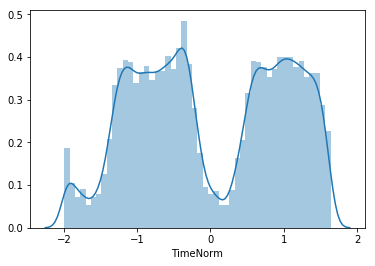

In [56]:
sns.distplot(train_data.TimeNorm)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


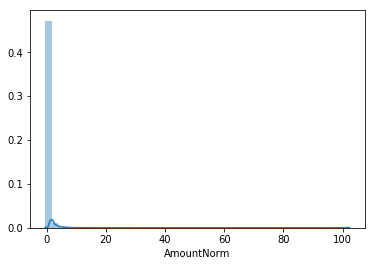

In [57]:
sns.distplot(train_data.AmountNorm)

In [58]:
X = train_data.drop('Class', axis=1)
y = train_data.Class

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(190820, 30) (190820,) (93987, 30) (93987,)


In [63]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [69]:
X_train_if = X_train[y_train==0]

In [66]:
if_clf = IsolationForest(n_estimators=100, max_samples=.30, contamination=0.15, random_state=11, n_jobs=-1)

In [70]:
if_clf.fit(X_train_if)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


IsolationForest(bootstrap=False, contamination=0.15, max_features=1.0,
        max_samples=0.3, n_estimators=100, n_jobs=-1, random_state=11,
        verbose=0)

In [87]:
if_scores = if_clf.decision_function(X_test)

In [71]:
# Prediction
testpred_if = if_clf.predict(X_test)

In [80]:
(testpred_if == -1).sum(), (testpred_if == 1).sum()

(14236, 79751)

In [81]:
testpred = list(map(lambda x: 1*(x == -1), testpred_if))

In [94]:
IF_predictions = pd.DataFrame({
    "predicted_class": list(map(lambda x: 1*(x == -1), testpred_if)),
    "orig_class": y_test,
    "predict": if_scores
})
IF_predictions.head()

,predicted_class,orig_class,predict
38710,0,0,0.160381
252425,1,0,0.146097
251320,0,0,0.158571
80239,0,0,0.165401
209783,0,0,0.161479


In [89]:
IF_predictions.predicted_class.value_counts()

0    79751
1    14236
Name: predicted_class, dtype: int64

In [90]:
IF_predictions.orig_class.value_counts()

0    93810
1      177
Name: orig_class, dtype: int64

In [ ]:
pd.crosstab(y_test, test_pred, margins=True)

In [ ]:
### There were total of 284807 transactions in the dataset. This included 284315 non fraud and 492 fraud.
### True Positive(TP) : Out of 284807 normal txns, 256273   were correctly predicted as NORMAL
### False Negative (FN) : Out of 284807 normal txns, 28042 were incorrectly predicted as FRAUD. 
### False Positive (FP) : Out of 492 fraudulent txns, 53 were incorrectly predicted as NORMAL
### True Negative (TN) : Out of 492 fraudulent txns, 439 were correctly predicted as FRAUD. 